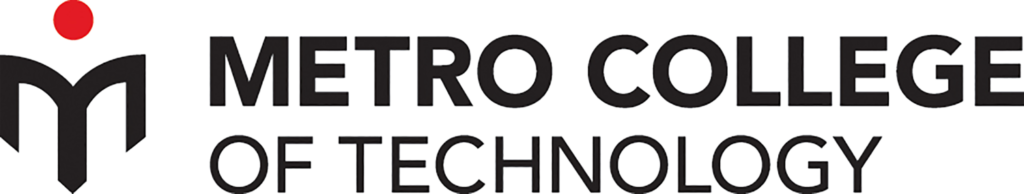

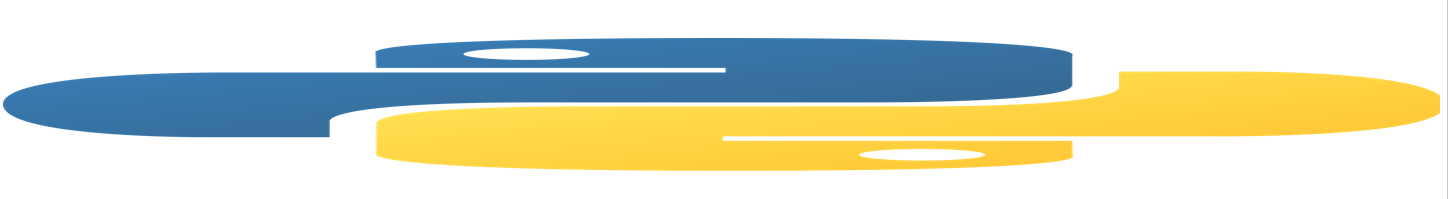

# Project For Predicting People with Cardiovascular Diseases using Classification Machine Learning Models in Python Programming


# --------------------------------------------------------- 
# Submitted by:
# Mohammad Monjur-E-Elahi
# Course: Data Science Project Using Python [DSA13]
# Program: Data Science and Application - Advanced Diploma [6060]
# Metro College of Technology
# Date: 17 July, 2021

# ---------------------------------------------------------

# Introduction:


# Hypothesis about Cardiovascular Diseases:

# Hypothesis testing based on our Dataset:

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
os.chdir(r'C:\Users\ruzdomain\Desktop\DSP_PYTHON\INDIVIDUAL_PROJECT')

In [3]:
os.getcwd()

'C:\\Users\\ruzdomain\\Desktop\\DSP_PYTHON\\INDIVIDUAL_PROJECT'

In [4]:
df_class= pd.read_csv("Data/cardio_train.csv", sep=';')
df_class.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  988  22469       1     155    69.0    130     80            2     2      0   
1  989  14648       1     163    71.0    110     70            1     1      0   
2  990  21901       1     165    70.0    120     80            1     1      0   
3  991  14549       2     165    85.0    120     80            1     1      1   
4  992  23393       1     155    62.0    120     80            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       1       0  
3     1       1       0  
4     0       1       0

In [5]:
df_class.shape

(69301, 13)

In [6]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
missingrows = df_class.isna().sum()

In [8]:
missingrows

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<AxesSubplot:>

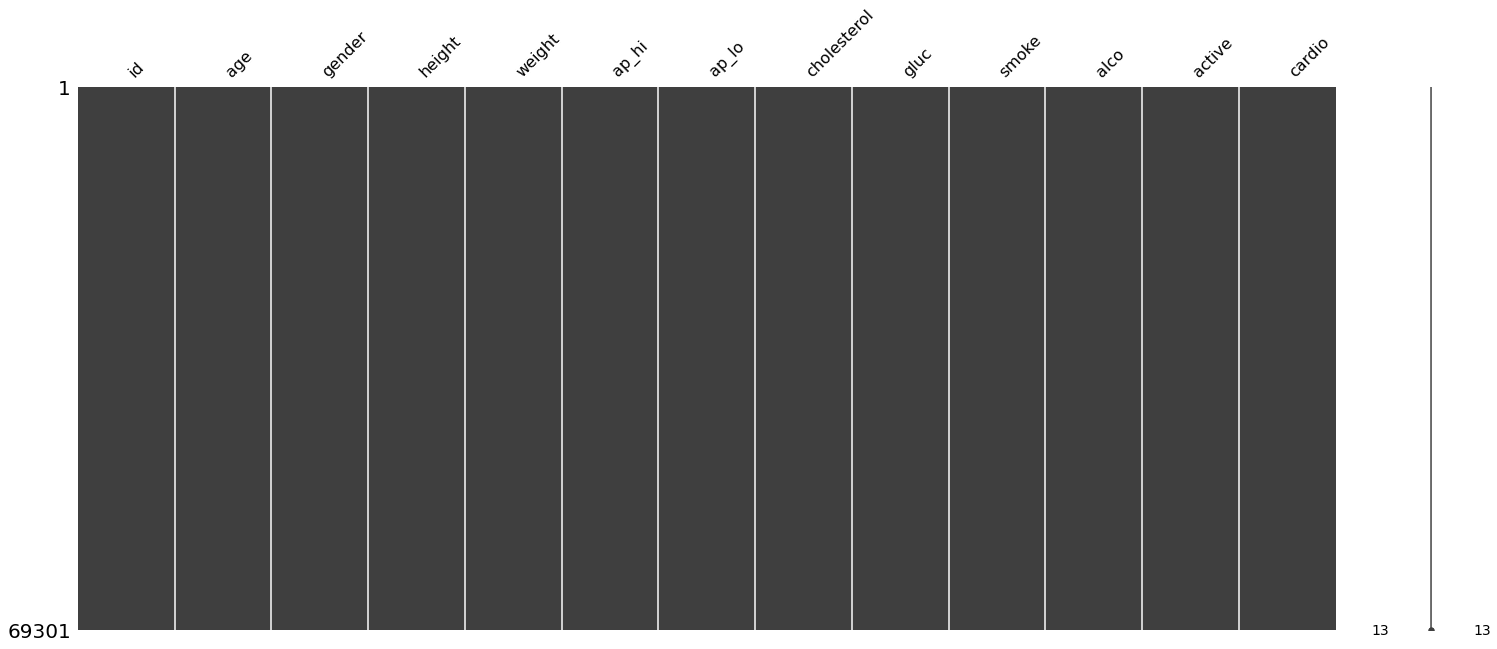

In [9]:
import missingno as msno
msno.matrix(df_class)

In [10]:
df_class.duplicated().sum()

0

In [11]:
df_class=df_class.rename(columns={'id':'Identification_Number', 'age':'Age_In_Days', 'gender':'Gender', 'height':'Height',
                                    'weight':'Weight','ap_hi':'Systolic_BP', 'ap_lo':'Diastolic_BP', 
                                    'cholesterol':'Cholesterol_Level', 'gluc':'Glucose_Level', 'smoke':'Smoker', 
                                    'alco':'Drinker', 'active':'Physically_Active', 'cardio':'CVD_Patient'})

In [12]:
df_class.head()

Identification_Number  Age_In_Days  Gender  Height  Weight  Systolic_BP  \
0                    988        22469       1     155    69.0          130   
1                    989        14648       1     163    71.0          110   
2                    990        21901       1     165    70.0          120   
3                    991        14549       2     165    85.0          120   
4                    992        23393       1     155    62.0          120   

   Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  Drinker  \
0            80                  2              2       0        0   
1            70                  1              1       0        0   
2            80                  1              1       0        0   
3            80                  1              1       1        1   
4            80                  1              1       0        0   

   Physically_Active  CVD_Patient  
0                  1            0  
1                  1            1  
2                  1            0  
3                  1            0  
4                  1            0

In [13]:
pd.options.display.float_format = "{:.2f}".format
df_class.describe()

Identification_Number  Age_In_Days   Gender   Height   Weight  \
count               69301.00     69301.00 69301.00 69301.00 69301.00   
mean                50471.48     19468.79     1.35   164.36    74.20   
std                 28563.10      2467.26     0.48     8.21    14.38   
min                   988.00     10798.00     1.00    55.00    10.00   
25%                 25745.00     17664.00     1.00   159.00    65.00   
50%                 50494.00     19704.00     1.00   165.00    72.00   
75%                 75150.00     21326.00     2.00   170.00    82.00   
max                 99999.00     23713.00     2.00   250.00   200.00   

       Systolic_BP  Diastolic_BP  Cholesterol_Level  Glucose_Level   Smoker  \
count     69301.00      69301.00           69301.00       69301.00 69301.00   
mean        128.83         96.65               1.37           1.23     0.09   
std         154.78        189.10               0.68           0.57     0.28   
min        -150.00        -70.00               1.00           1.00     0.00   
25%         120.00         80.00               1.00           1.00     0.00   
50%         120.00         80.00               1.00           1.00     0.00   
75%         140.00         90.00               2.00           1.00     0.00   
max       16020.00      11000.00               3.00           3.00     1.00   

       Drinker  Physically_Active  CVD_Patient  
count 69301.00           69301.00     69301.00  
mean      0.05               0.80         0.50  
std       0.23               0.40         0.50  
min       0.00               0.00         0.00  
25%       0.00               1.00         0.00  
50%       0.00               1.00         0.00  
75%       0.00               1.00         1.00  
max       1.00               1.00         1.00

In [14]:
df_class.apply(lambda x: len(x.unique()))

Identification_Number    69301
Age_In_Days               8069
Gender                       2
Height                     108
Weight                     285
Systolic_BP                153
Diastolic_BP               157
Cholesterol_Level            3
Glucose_Level                3
Smoker                       2
Drinker                      2
Physically_Active            2
CVD_Patient                  2
dtype: int64

In [15]:
#sns.pairplot(df_class)

# Univariate Analysis

Text(0.5, 0, 'Weight in Kilograms')

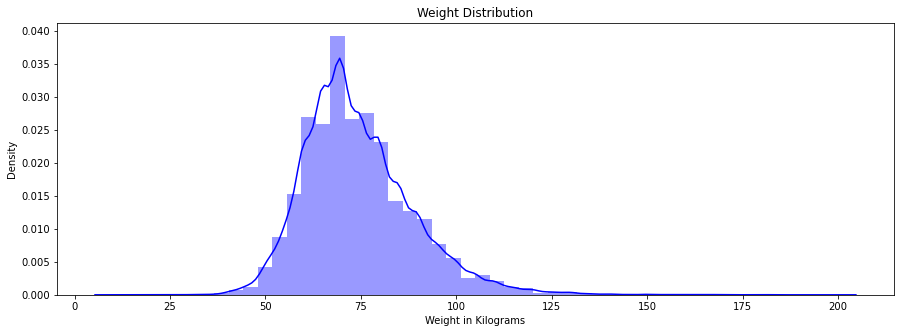

In [16]:
%matplotlib inline
plt.figure(figsize=(15,5))
sns.distplot(df_class["Weight"], color="blue")
plt.title("Weight Distribution")
plt.ylabel("Density")
plt.xlabel("Weight in Kilograms")

Text(0.5, 0, 'Height in Centimeters')

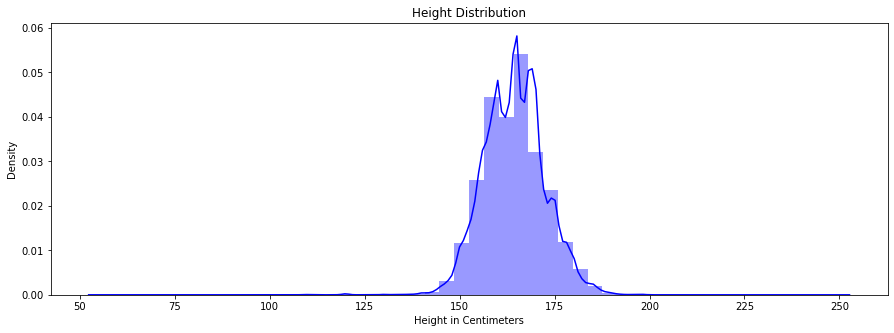

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df_class["Height"], color="blue")
plt.title("Height Distribution")
plt.ylabel("Density")
plt.xlabel("Height in Centimeters")

Text(0.5, 0, 'Age in Number of days')

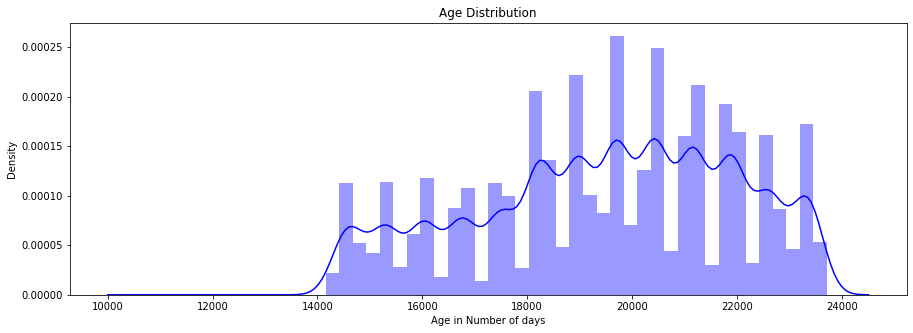

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df_class["Age_In_Days"], color="blue")
plt.title("Age Distribution")
plt.ylabel("Density")
plt.xlabel("Age in Number of days")

Text(0.5, 0, 'Systolic Blood Pressure in mm of Hg')

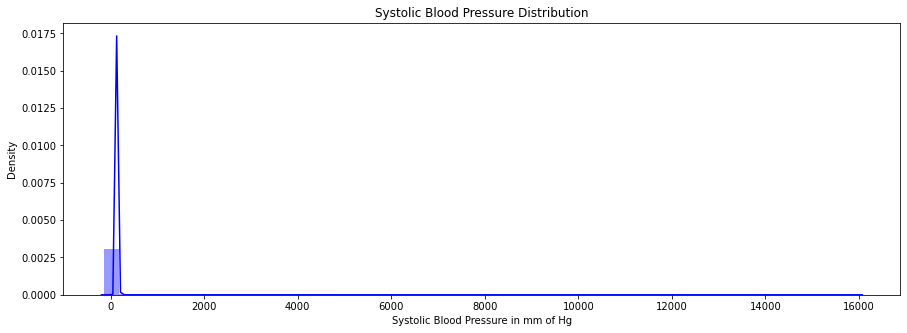

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df_class["Systolic_BP"], color="blue")
plt.title("Systolic Blood Pressure Distribution")
plt.ylabel("Density")
plt.xlabel("Systolic Blood Pressure in mm of Hg")

Text(0.5, 0, 'Diastolic Blood Pressure in mm of Hg')

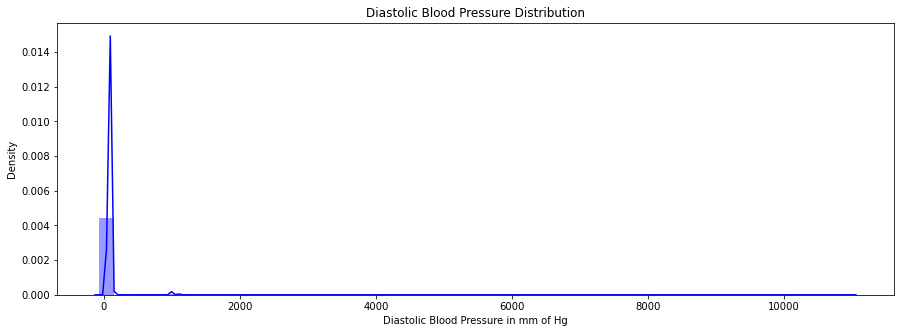

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(df_class["Diastolic_BP"], color="blue")
plt.title("Diastolic Blood Pressure Distribution")
plt.ylabel("Density")
plt.xlabel("Diastolic Blood Pressure in mm of Hg")

In [21]:
Cardio_Disease=df_class['CVD_Patient'].value_counts()
Cardio_Disease

0    34679
1    34622
Name: CVD_Patient, dtype: int64

Text(0.5, 1, 'Distribution of CVD Patient')

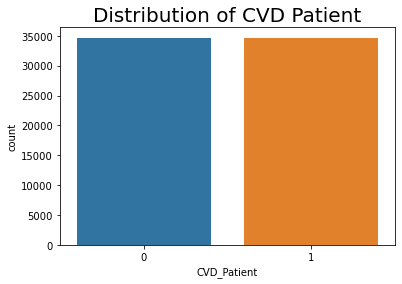

In [22]:
#countplot
sns.countplot(df_class['CVD_Patient'])
plt.title("Distribution of CVD Patient", y=1, fontdict={"fontsize": 20})

In [23]:
Active=df_class['Physically_Active'].value_counts()
Active

1    55717
0    13584
Name: Physically_Active, dtype: int64

Text(0.5, 1, 'Distribution of Physically Active')

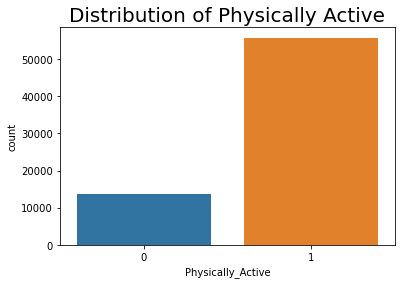

In [24]:
#countplot
sns.countplot(df_class['Physically_Active'])
plt.title("Distribution of Physically Active", y=1, fontdict={"fontsize": 20})

In [27]:
Alcoholic=df_class['Drinker'].value_counts()
Alcoholic

0    65567
1     3734
Name: Drinker, dtype: int64

Text(0.5, 1, 'Distribution of People Who Drink')

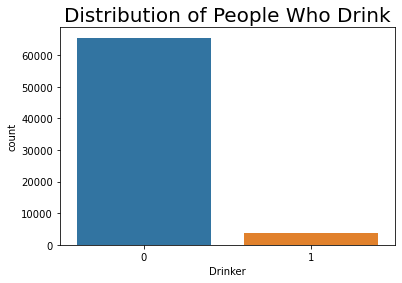

In [28]:
#countplot
sns.countplot(df_class['Drinker'])
plt.title("Distribution of People Who Drink", y=1, fontdict={"fontsize": 20})

In [30]:
Cholesterol=df_class['Cholesterol_Level'].value_counts()
Cholesterol

1    51868
2     9446
3     7987
Name: Cholesterol_Level, dtype: int64

Text(0.5, 1, 'Distribution of Cholesterol Level')

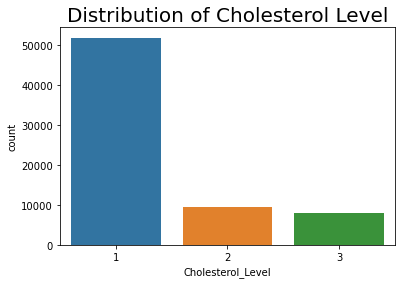

In [31]:
#countplot
sns.countplot(df_class['Cholesterol_Level'])
plt.title("Distribution of Cholesterol Level", y=1, fontdict={"fontsize": 20})

In [32]:
Gender=df_class['Gender'].value_counts()
Gender

1    45079
2    24222
Name: Gender, dtype: int64

Text(0.5, 1, 'Distribution of Gender')

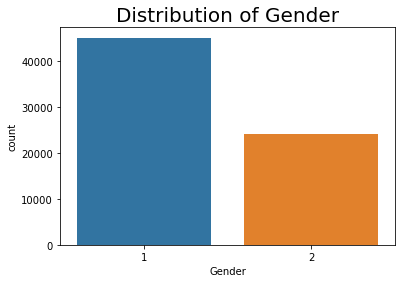

In [33]:
#countplot
sns.countplot(df_class['Gender'])
plt.title("Distribution of Gender", y=1, fontdict={"fontsize": 20})

In [34]:
Glucose_Level=df_class['Glucose_Level'].value_counts()
Glucose_Level

1    58885
3     5277
2     5139
Name: Glucose_Level, dtype: int64

Text(0.5, 1, 'Distribution of Glucose Level')

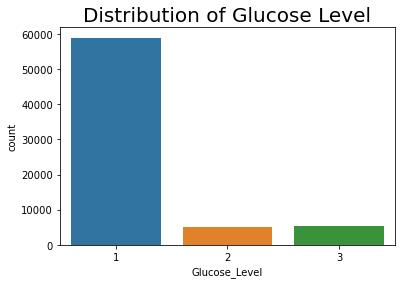

In [35]:
#countplot
sns.countplot(df_class['Glucose_Level'])
plt.title("Distribution of Glucose Level", y=1, fontdict={"fontsize": 20})

In [36]:
Smoker=df_class['Smoker'].value_counts()
Smoker

0    63199
1     6102
Name: Smoker, dtype: int64

Text(0.5, 1, 'Distribution of Smoker')

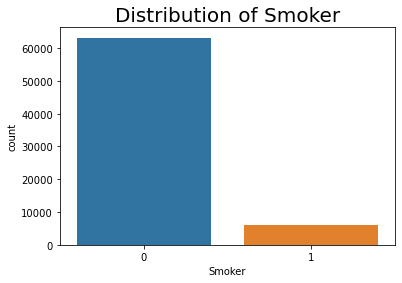

In [37]:
#countplot
sns.countplot(df_class['Smoker'])
plt.title("Distribution of Smoker", y=1, fontdict={"fontsize": 20})

In [38]:
df_class.head()

Identification_Number  Age_In_Days  Gender  Height  Weight  Systolic_BP  \
0                    988        22469       1     155   69.00          130   
1                    989        14648       1     163   71.00          110   
2                    990        21901       1     165   70.00          120   
3                    991        14549       2     165   85.00          120   
4                    992        23393       1     155   62.00          120   

   Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  Drinker  \
0            80                  2              2       0        0   
1            70                  1              1       0        0   
2            80                  1              1       0        0   
3            80                  1              1       1        1   
4            80                  1              1       0        0   

   Physically_Active  CVD_Patient  
0                  1            0  
1                  1            1  
2                  1            0  
3                  1            0  
4                  1            0

In [39]:
df_class['Age_In_Days'].describe()

count   69301.00
mean    19468.79
std      2467.26
min     10798.00
25%     17664.00
50%     19704.00
75%     21326.00
max     23713.00
Name: Age_In_Days, dtype: float64

<AxesSubplot:ylabel='Age_In_Days'>

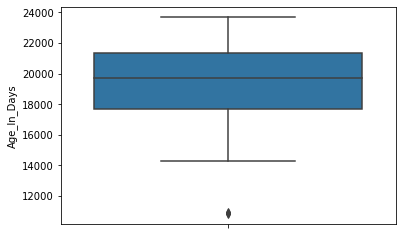

In [40]:
sns.boxplot( y=df_class['Age_In_Days'] )

In [41]:
df_class['Systolic_BP'].describe()

count   69301.00
mean      128.83
std       154.78
min      -150.00
25%       120.00
50%       120.00
75%       140.00
max     16020.00
Name: Systolic_BP, dtype: float64

<AxesSubplot:ylabel='Systolic_BP'>

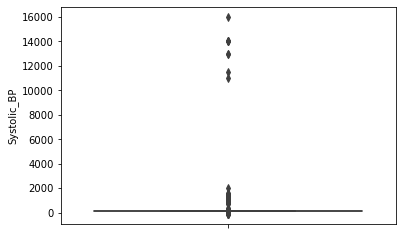

In [42]:
sns.boxplot( y=df_class['Systolic_BP'] )

In [43]:
df_class['Diastolic_BP'].describe()

count   69301.00
mean       96.65
std       189.10
min       -70.00
25%        80.00
50%        80.00
75%        90.00
max     11000.00
Name: Diastolic_BP, dtype: float64

<AxesSubplot:ylabel='Diastolic_BP'>

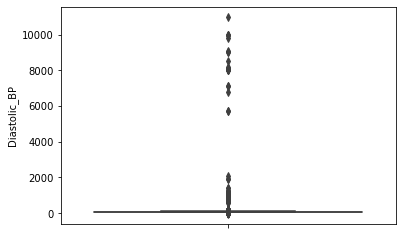

In [44]:
sns.boxplot( y=df_class['Diastolic_BP'] )

In [45]:
df_class['Height'].describe()

count   69301.00
mean      164.36
std         8.21
min        55.00
25%       159.00
50%       165.00
75%       170.00
max       250.00
Name: Height, dtype: float64

<AxesSubplot:ylabel='Height'>

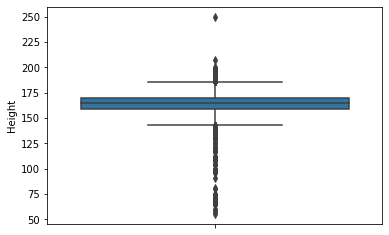

In [46]:
sns.boxplot( y=df_class['Height'] )

In [47]:
df_class['Weight'].describe()

count   69301.00
mean       74.20
std        14.38
min        10.00
25%        65.00
50%        72.00
75%        82.00
max       200.00
Name: Weight, dtype: float64

<AxesSubplot:ylabel='Weight'>

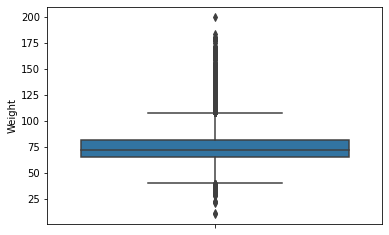

In [48]:
sns.boxplot( y=df_class['Weight'] )

In [49]:
df_class.head()

Identification_Number  Age_In_Days  Gender  Height  Weight  Systolic_BP  \
0                    988        22469       1     155   69.00          130   
1                    989        14648       1     163   71.00          110   
2                    990        21901       1     165   70.00          120   
3                    991        14549       2     165   85.00          120   
4                    992        23393       1     155   62.00          120   

   Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  Drinker  \
0            80                  2              2       0        0   
1            70                  1              1       0        0   
2            80                  1              1       0        0   
3            80                  1              1       1        1   
4            80                  1              1       0        0   

   Physically_Active  CVD_Patient  
0                  1            0  
1                  1            1  
2                  1            0  
3                  1            0  
4                  1            0

# Bivariate Analysis

In [50]:
contingency_table1 = pd.crosstab(df_class['Physically_Active'],df_class['CVD_Patient'],margins = True)
contingency_table1

CVD_Patient            0      1    All
Physically_Active                     
0                   6308   7276  13584
1                  28371  27346  55717
All                34679  34622  69301

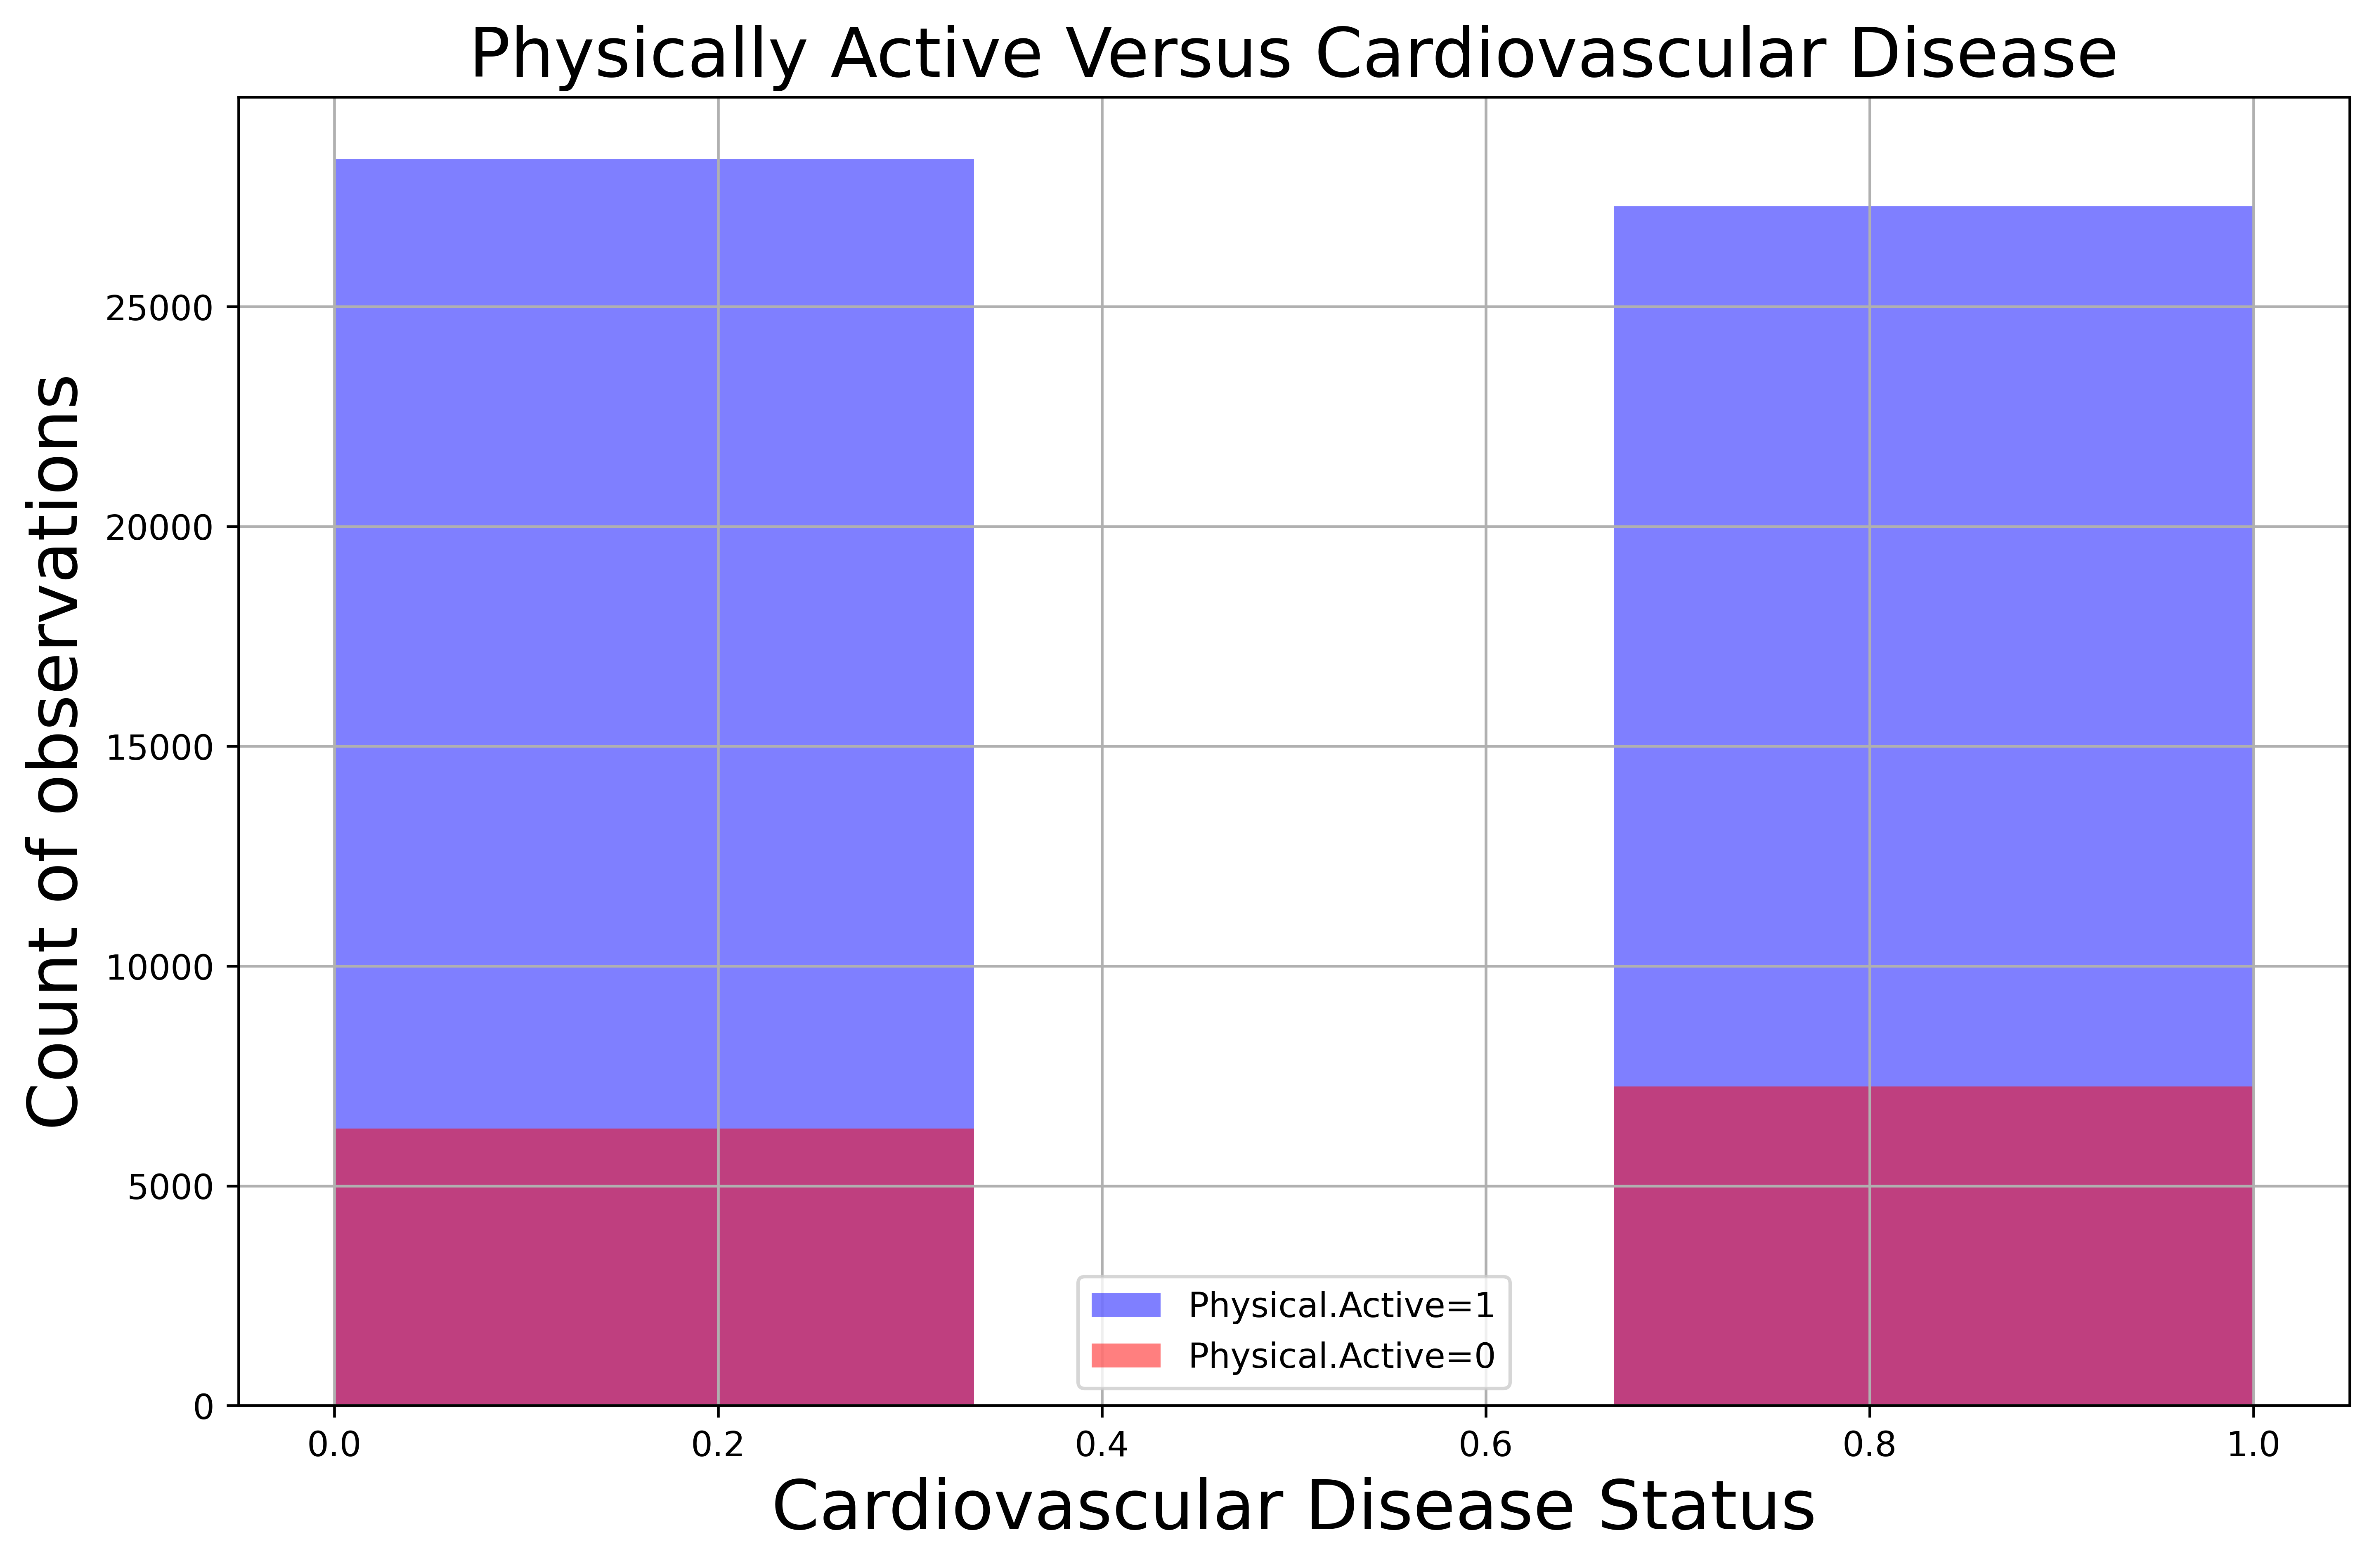

In [186]:
plt.figure(figsize=(11,7), dpi=600)
df_class[df_class['Physically_Active']==1]['CVD_Patient'].hist(alpha=0.5,color='blue',
                                              bins=3,label='Physical.Active=1')
df_class[df_class['Physically_Active']==0]['CVD_Patient'].hist(alpha=0.5,color='red',
                                              bins=3,label='Physical.Active=0')
plt.legend()
plt.title("Physically Active Versus Cardiovascular Disease", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Cardiovascular Disease Status", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("Physically_ActiveVCVD_Patient.png",dpi=600)

In [51]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df_class[c1],df_class[c2],margins = False))# make sure margins = False

    print(exp_val)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at 0.05 significant level")
    else:
        print("\nThere is no correlation between the two variables")

In [52]:
chi_square("Physically_Active",'CVD_Patient')

[[ 6797.58641289  6786.41358711]
 [27881.41358711 27835.58641289]]

Chi-square is : 87.61038429054688 

p_value is : 7.970508094102845e-21 

degree of freedom is :1

There is some correlation between the two variables at 0.05 significant level


In [53]:
contingency_table2 = pd.crosstab(df_class['Drinker'],df_class['CVD_Patient'],margins = True)
contingency_table2

CVD_Patient      0      1    All
Drinker                         
0            32754  32813  65567
1             1925   1809   3734
All          34679  34622  69301

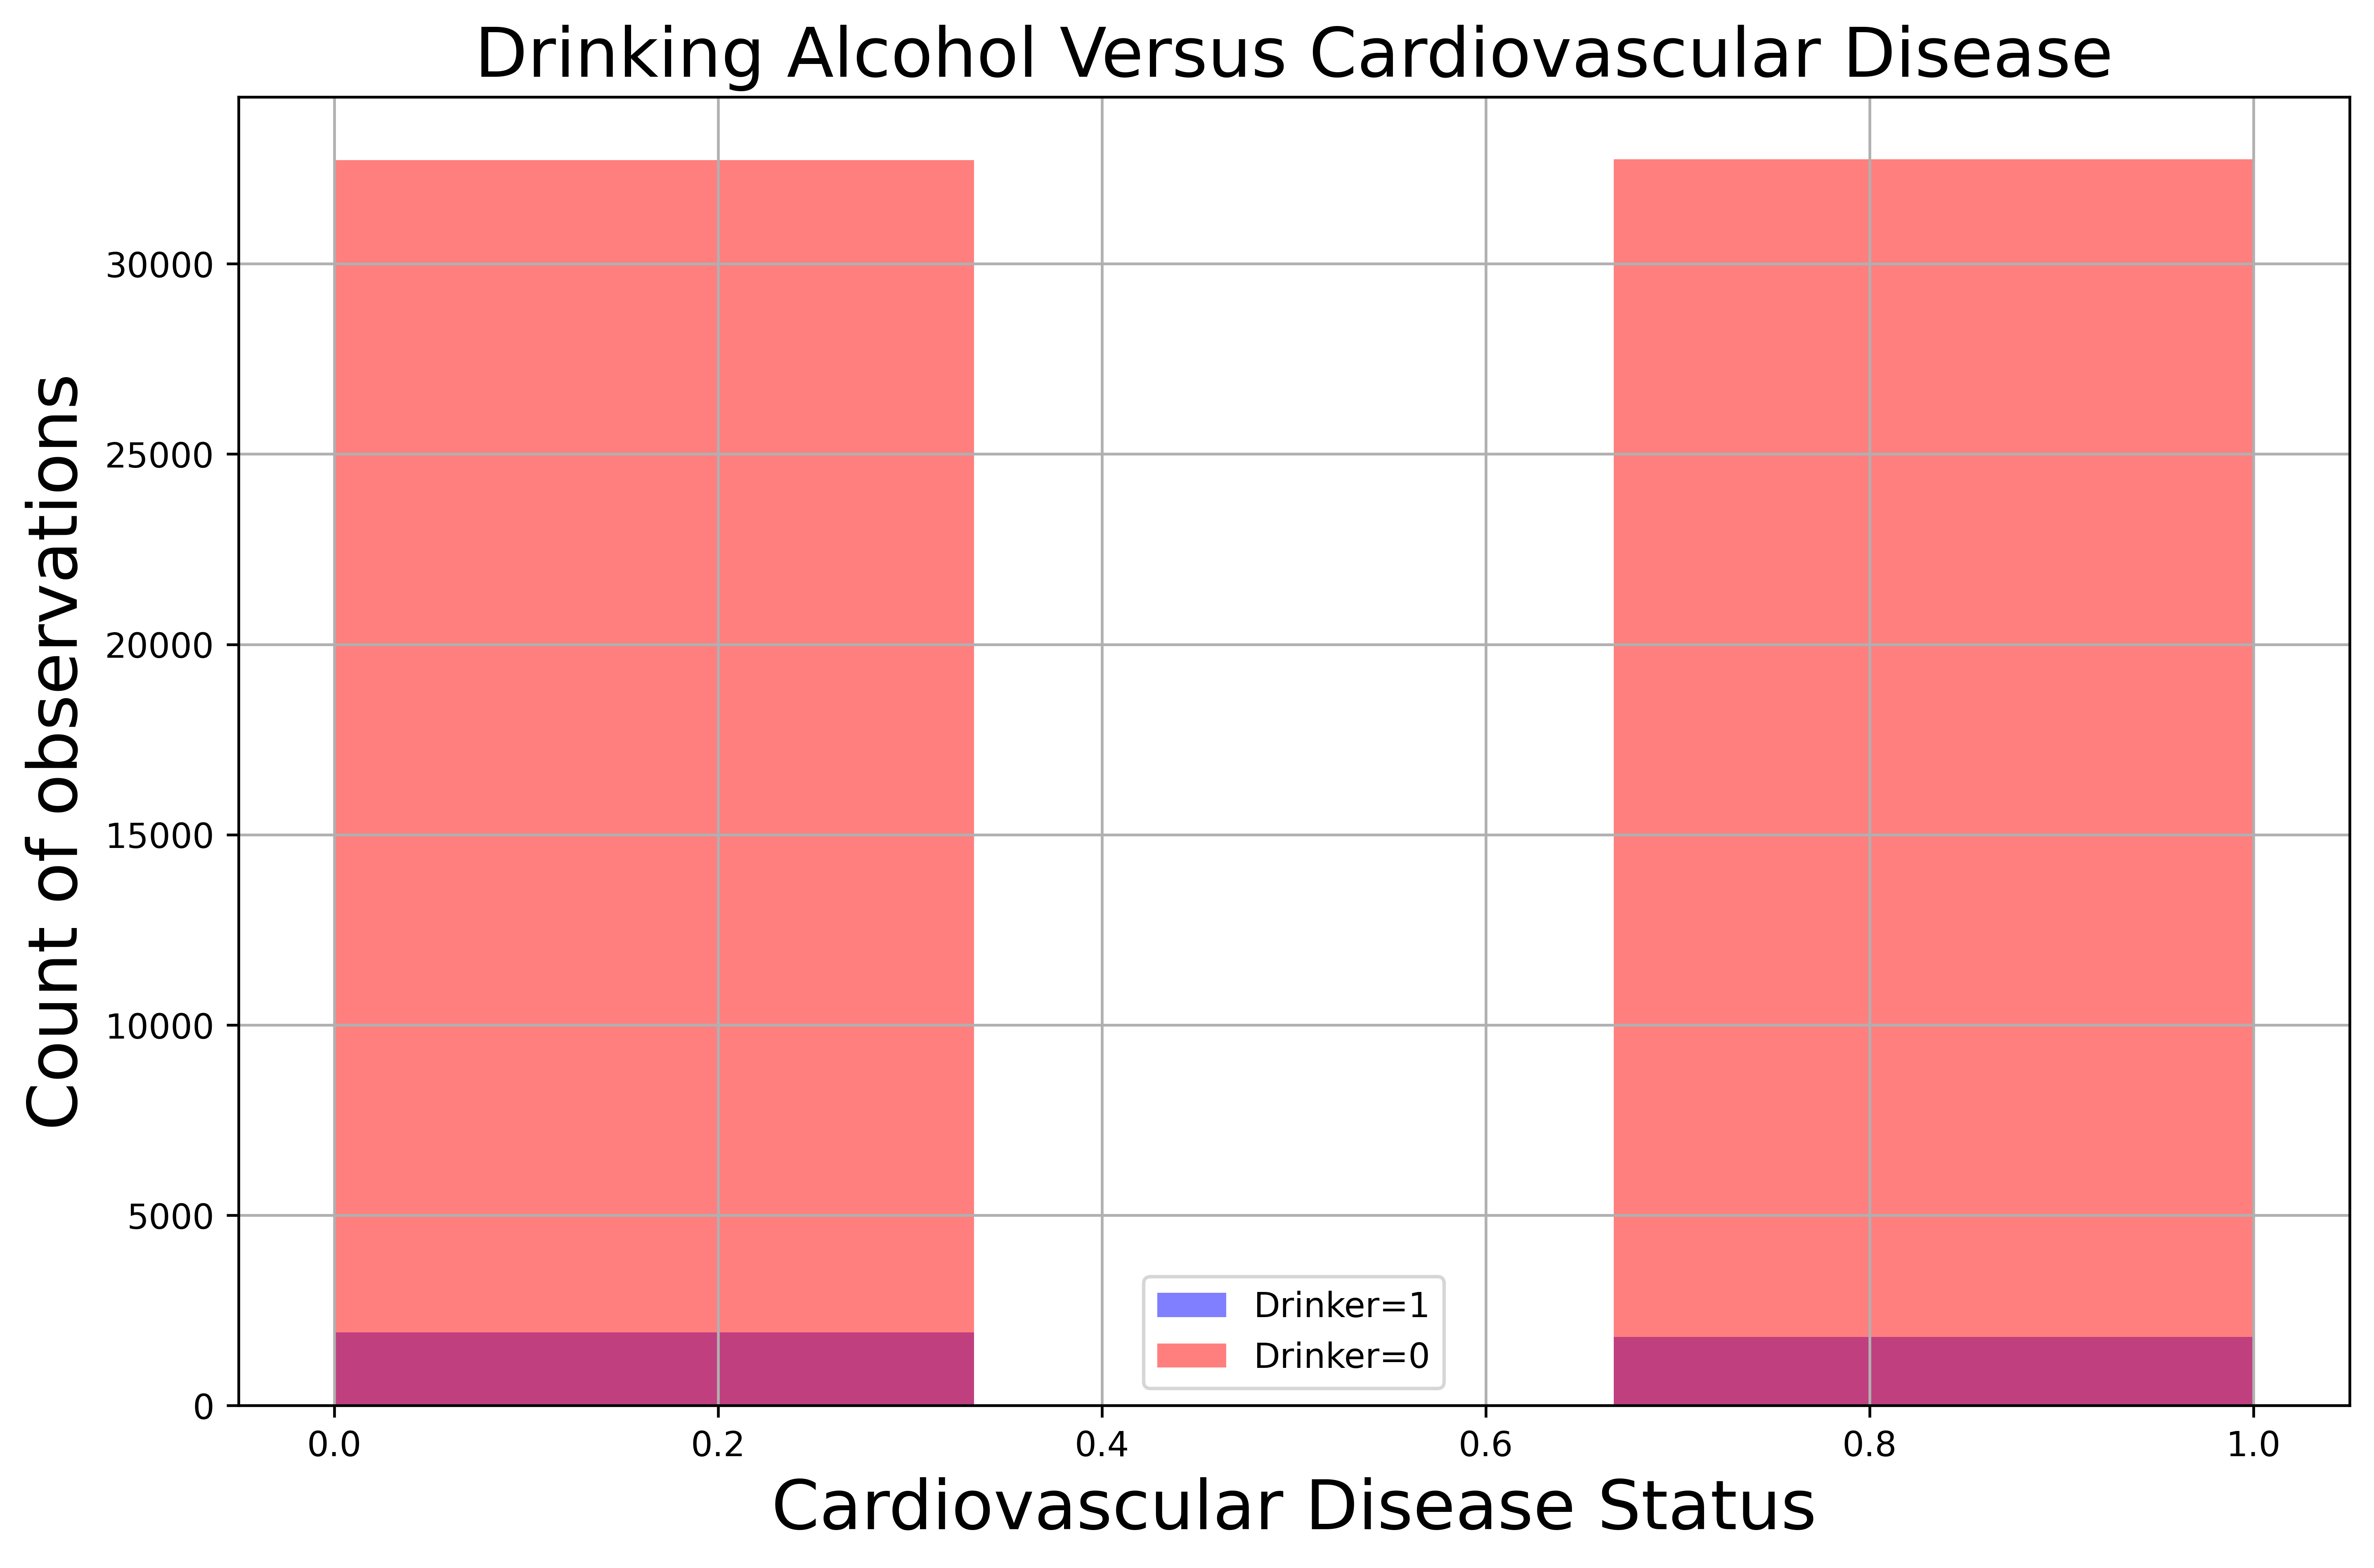

In [187]:
plt.figure(figsize=(11,7), dpi=600)
df_class[df_class['Drinker']==1]['CVD_Patient'].hist(alpha=0.5,color='blue',
                                              bins=3,label='Drinker=1')
df_class[df_class['Drinker']==0]['CVD_Patient'].hist(alpha=0.5,color='red',
                                              bins=3,label='Drinker=0')
plt.legend()
plt.title("Drinking Alcohol Versus Cardiovascular Disease", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Cardiovascular Disease Status", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("DrinkingVCVD_Patient.png",dpi=600)

In [188]:
chi_square("Drinker",'CVD_Patient')

[[32787.11784512 32685.88215488]
 [ 1866.88215488  1861.11784512]]

Chi-square is : 3.6353139872965423 

p_value is : 0.05656593373394771 

degree of freedom is :1

There is no correlation between the two variables


In [55]:
contingency_table3 = pd.crosstab(df_class['Gender'],df_class['CVD_Patient'],margins = True)
contingency_table3

CVD_Patient      0      1    All
Gender                          
1            22700  22379  45079
2            11979  12243  24222
All          34679  34622  69301

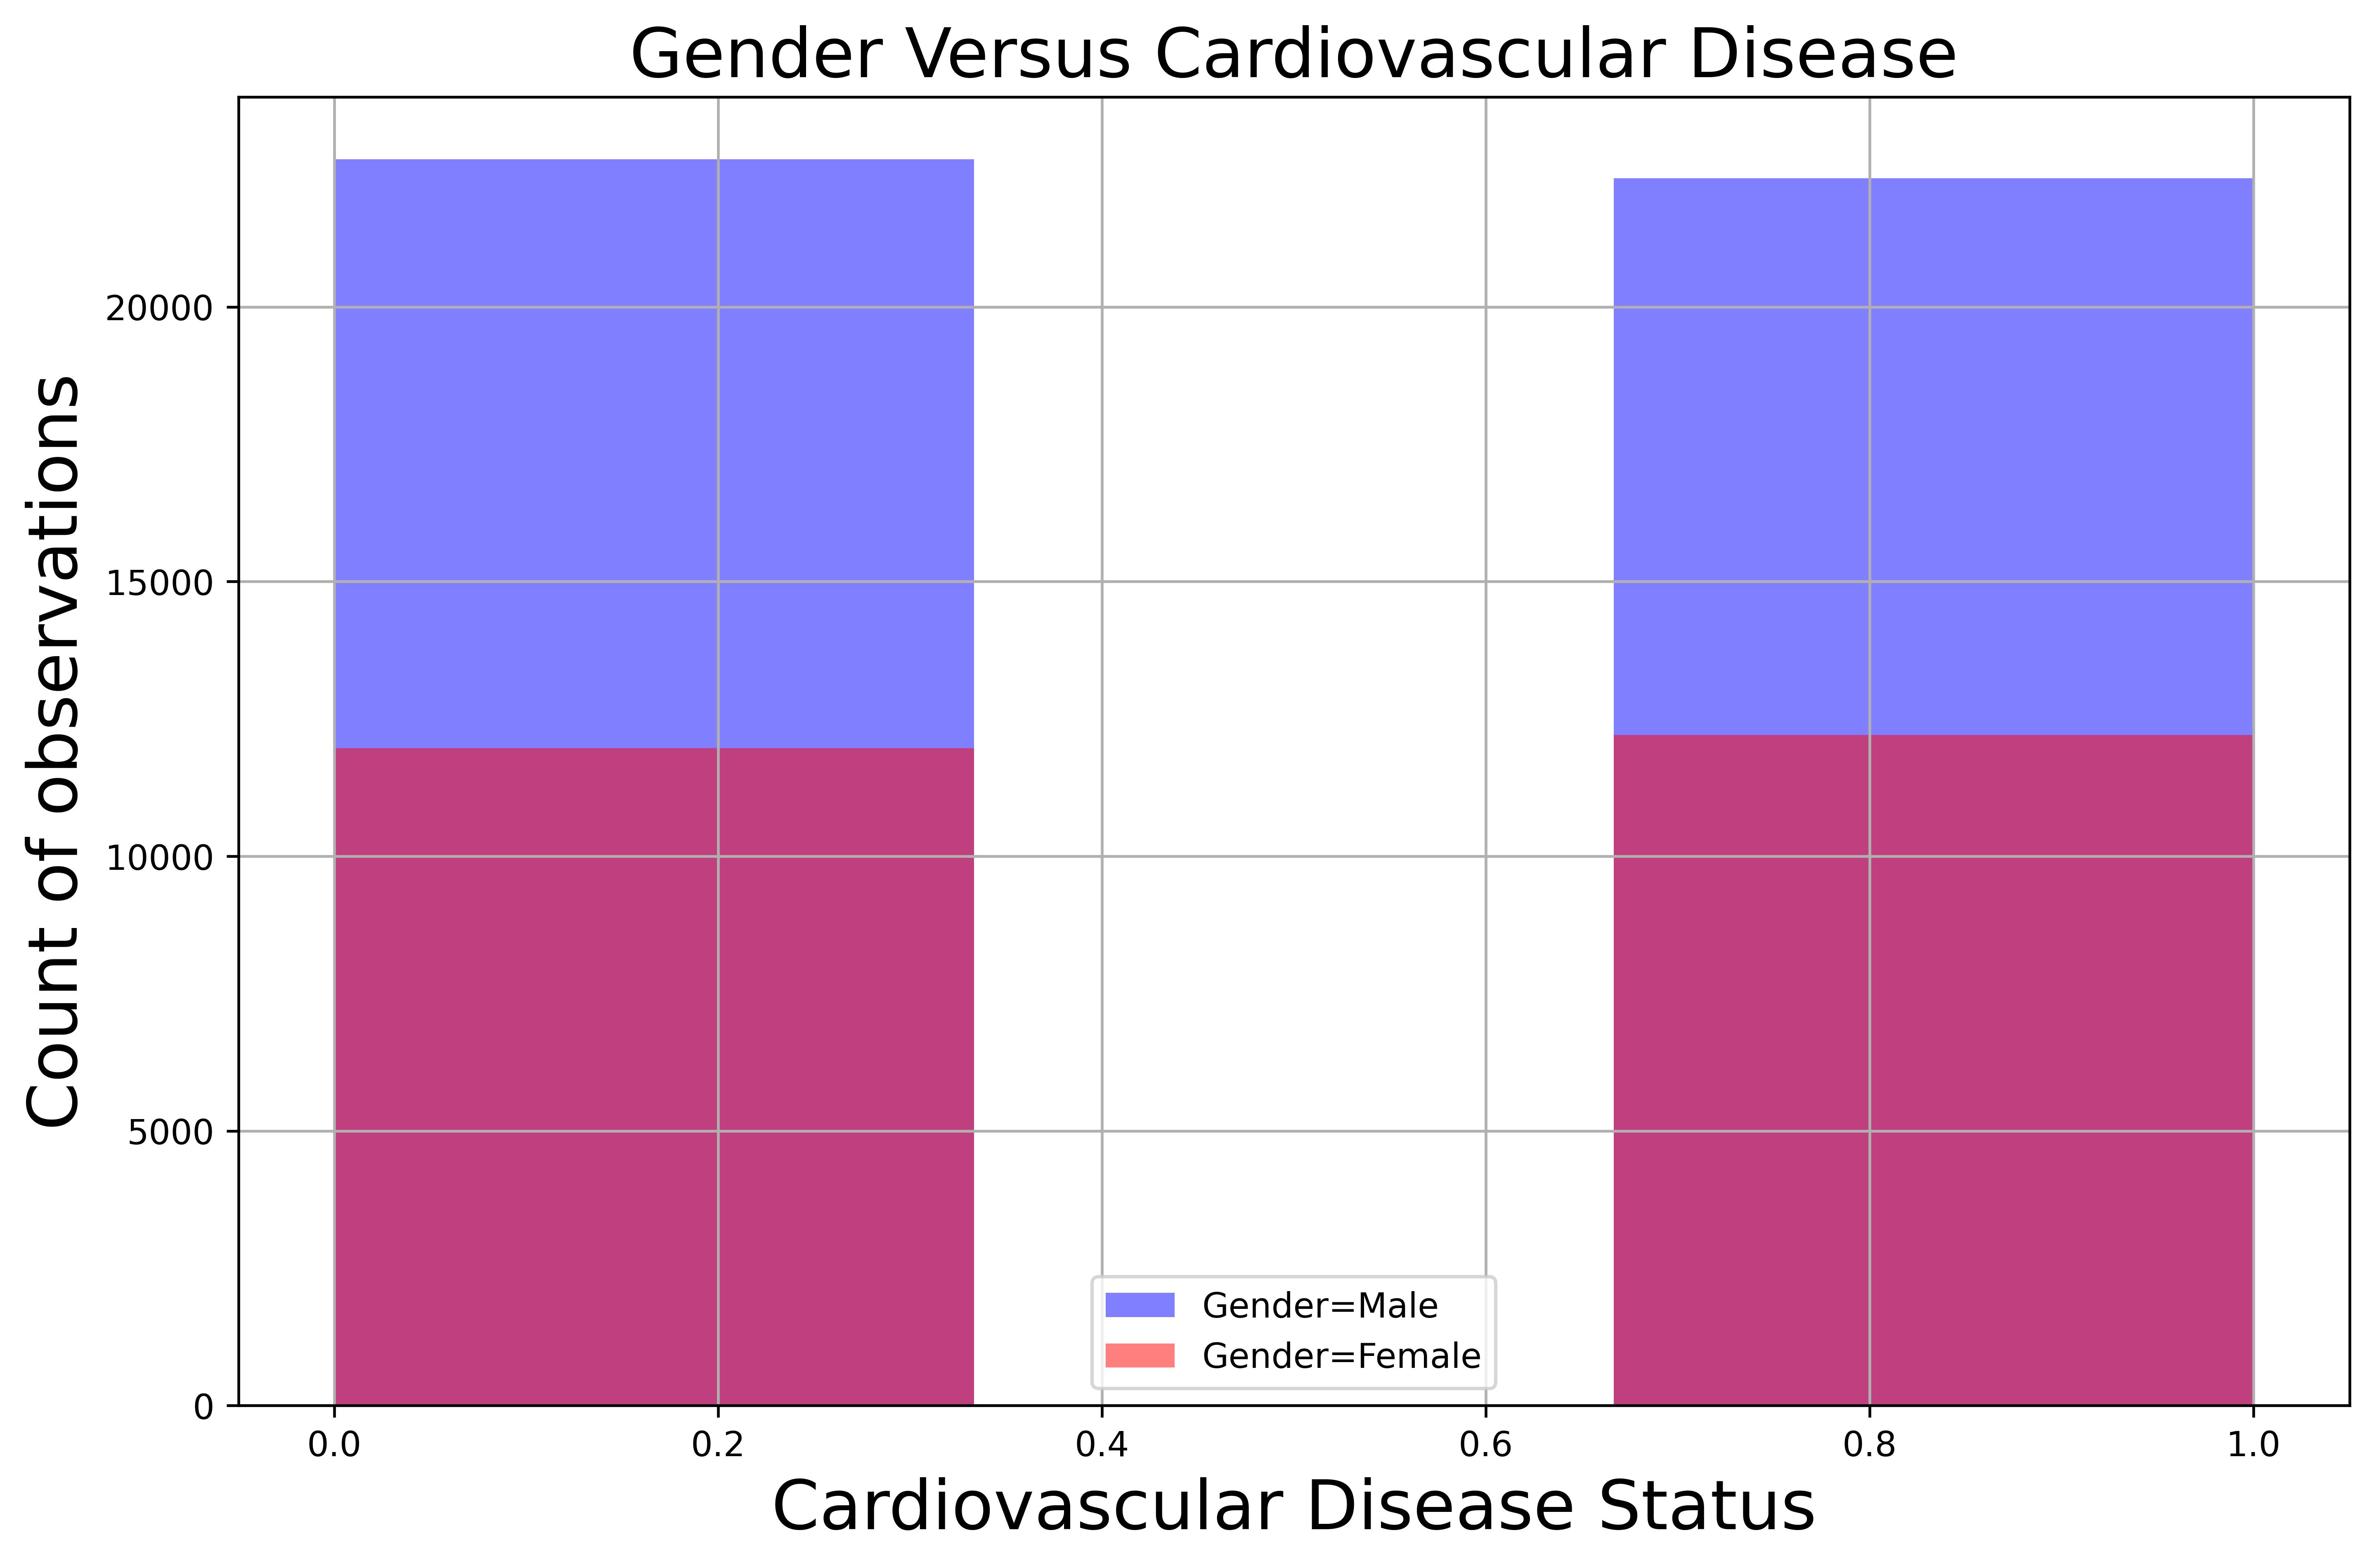

In [189]:
plt.figure(figsize=(11,7), dpi=600)
df_class[df_class['Gender']==1]['CVD_Patient'].hist(alpha=0.5,color='blue',
                                              bins=3,label='Gender=Male')
df_class[df_class['Gender']==2]['CVD_Patient'].hist(alpha=0.5,color='red',
                                              bins=3,label='Gender=Female')
plt.legend()
plt.title("Gender Versus Cardiovascular Disease", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Cardiovascular Disease Status", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("GenderVCVD_Patient.png",dpi=600)

In [56]:
chi_square("Gender",'CVD_Patient')

[[22558.03871517 22520.96128483]
 [12120.96128483 12101.03871517]]

Chi-square is : 5.080315804606429 

p_value is : 0.024198961909720845 

degree of freedom is :1

There is some correlation between the two variables at 0.05 significant level


In [57]:
contingency_table4 = pd.crosstab(df_class['Smoker'],df_class['CVD_Patient'],margins = True)
contingency_table4

CVD_Patient      0      1    All
Smoker                          
0            31476  31723  63199
1             3203   2899   6102
All          34679  34622  69301

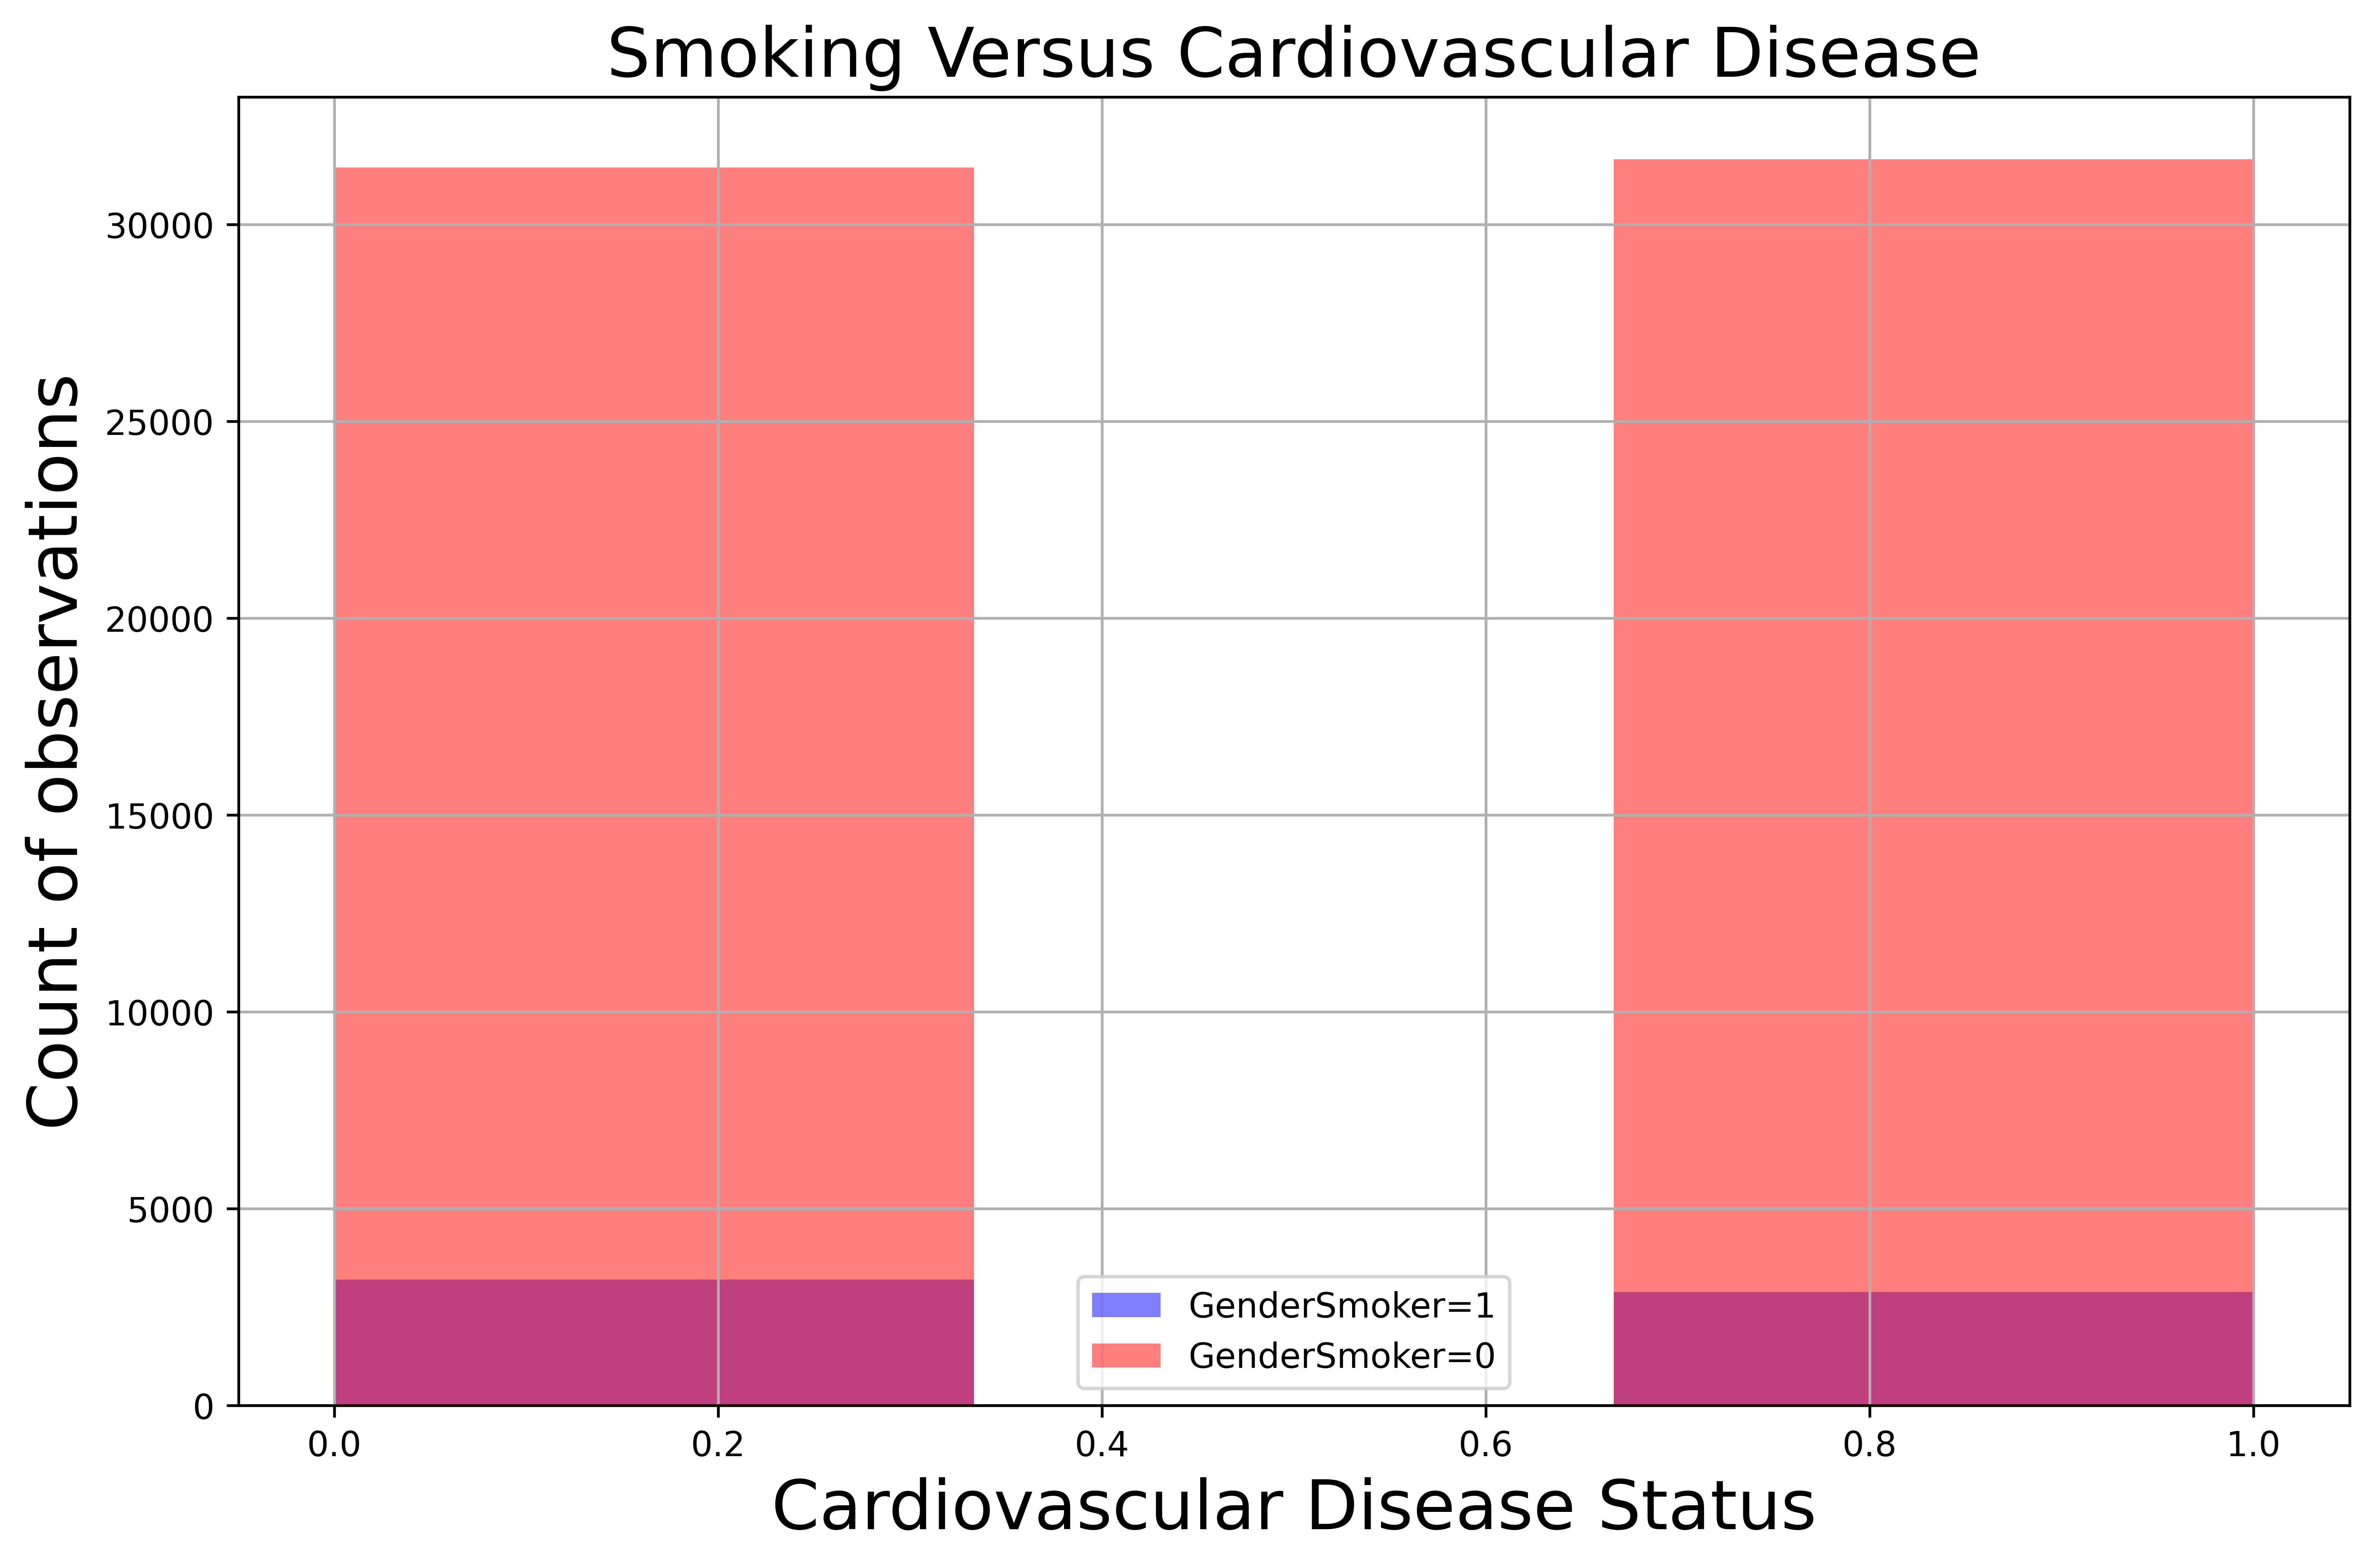

In [190]:
plt.figure(figsize=(11,7), dpi=600)
df_class[df_class['Smoker']==1]['CVD_Patient'].hist(alpha=0.5,color='blue',
                                              bins=3,label='GenderSmoker=1')
df_class[df_class['Smoker']==0]['CVD_Patient'].hist(alpha=0.5,color='red',
                                              bins=3,label='GenderSmoker=0')
plt.legend()
plt.title("Smoking Versus Cardiovascular Disease", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Cardiovascular Disease Status", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("SmokingVCVD_Patient.png",dpi=600)

In [58]:
chi_square("Smoker",'CVD_Patient')

[[31625.49055569 31573.50944431]
 [ 3053.50944431  3048.49055569]]

Chi-square is : 15.95639786469745 

p_value is : 6.481833250098175e-05 

degree of freedom is :1

There is some correlation between the two variables at 0.05 significant level


In [59]:
contingency_table5 = pd.crosstab(df_class['Cholesterol_Level'],df_class['CVD_Patient'],margins = True)
contingency_table5

CVD_Patient            0      1    All
Cholesterol_Level                     
1                  29043  22825  51868
2                   3755   5691   9446
3                   1881   6106   7987
All                34679  34622  69301

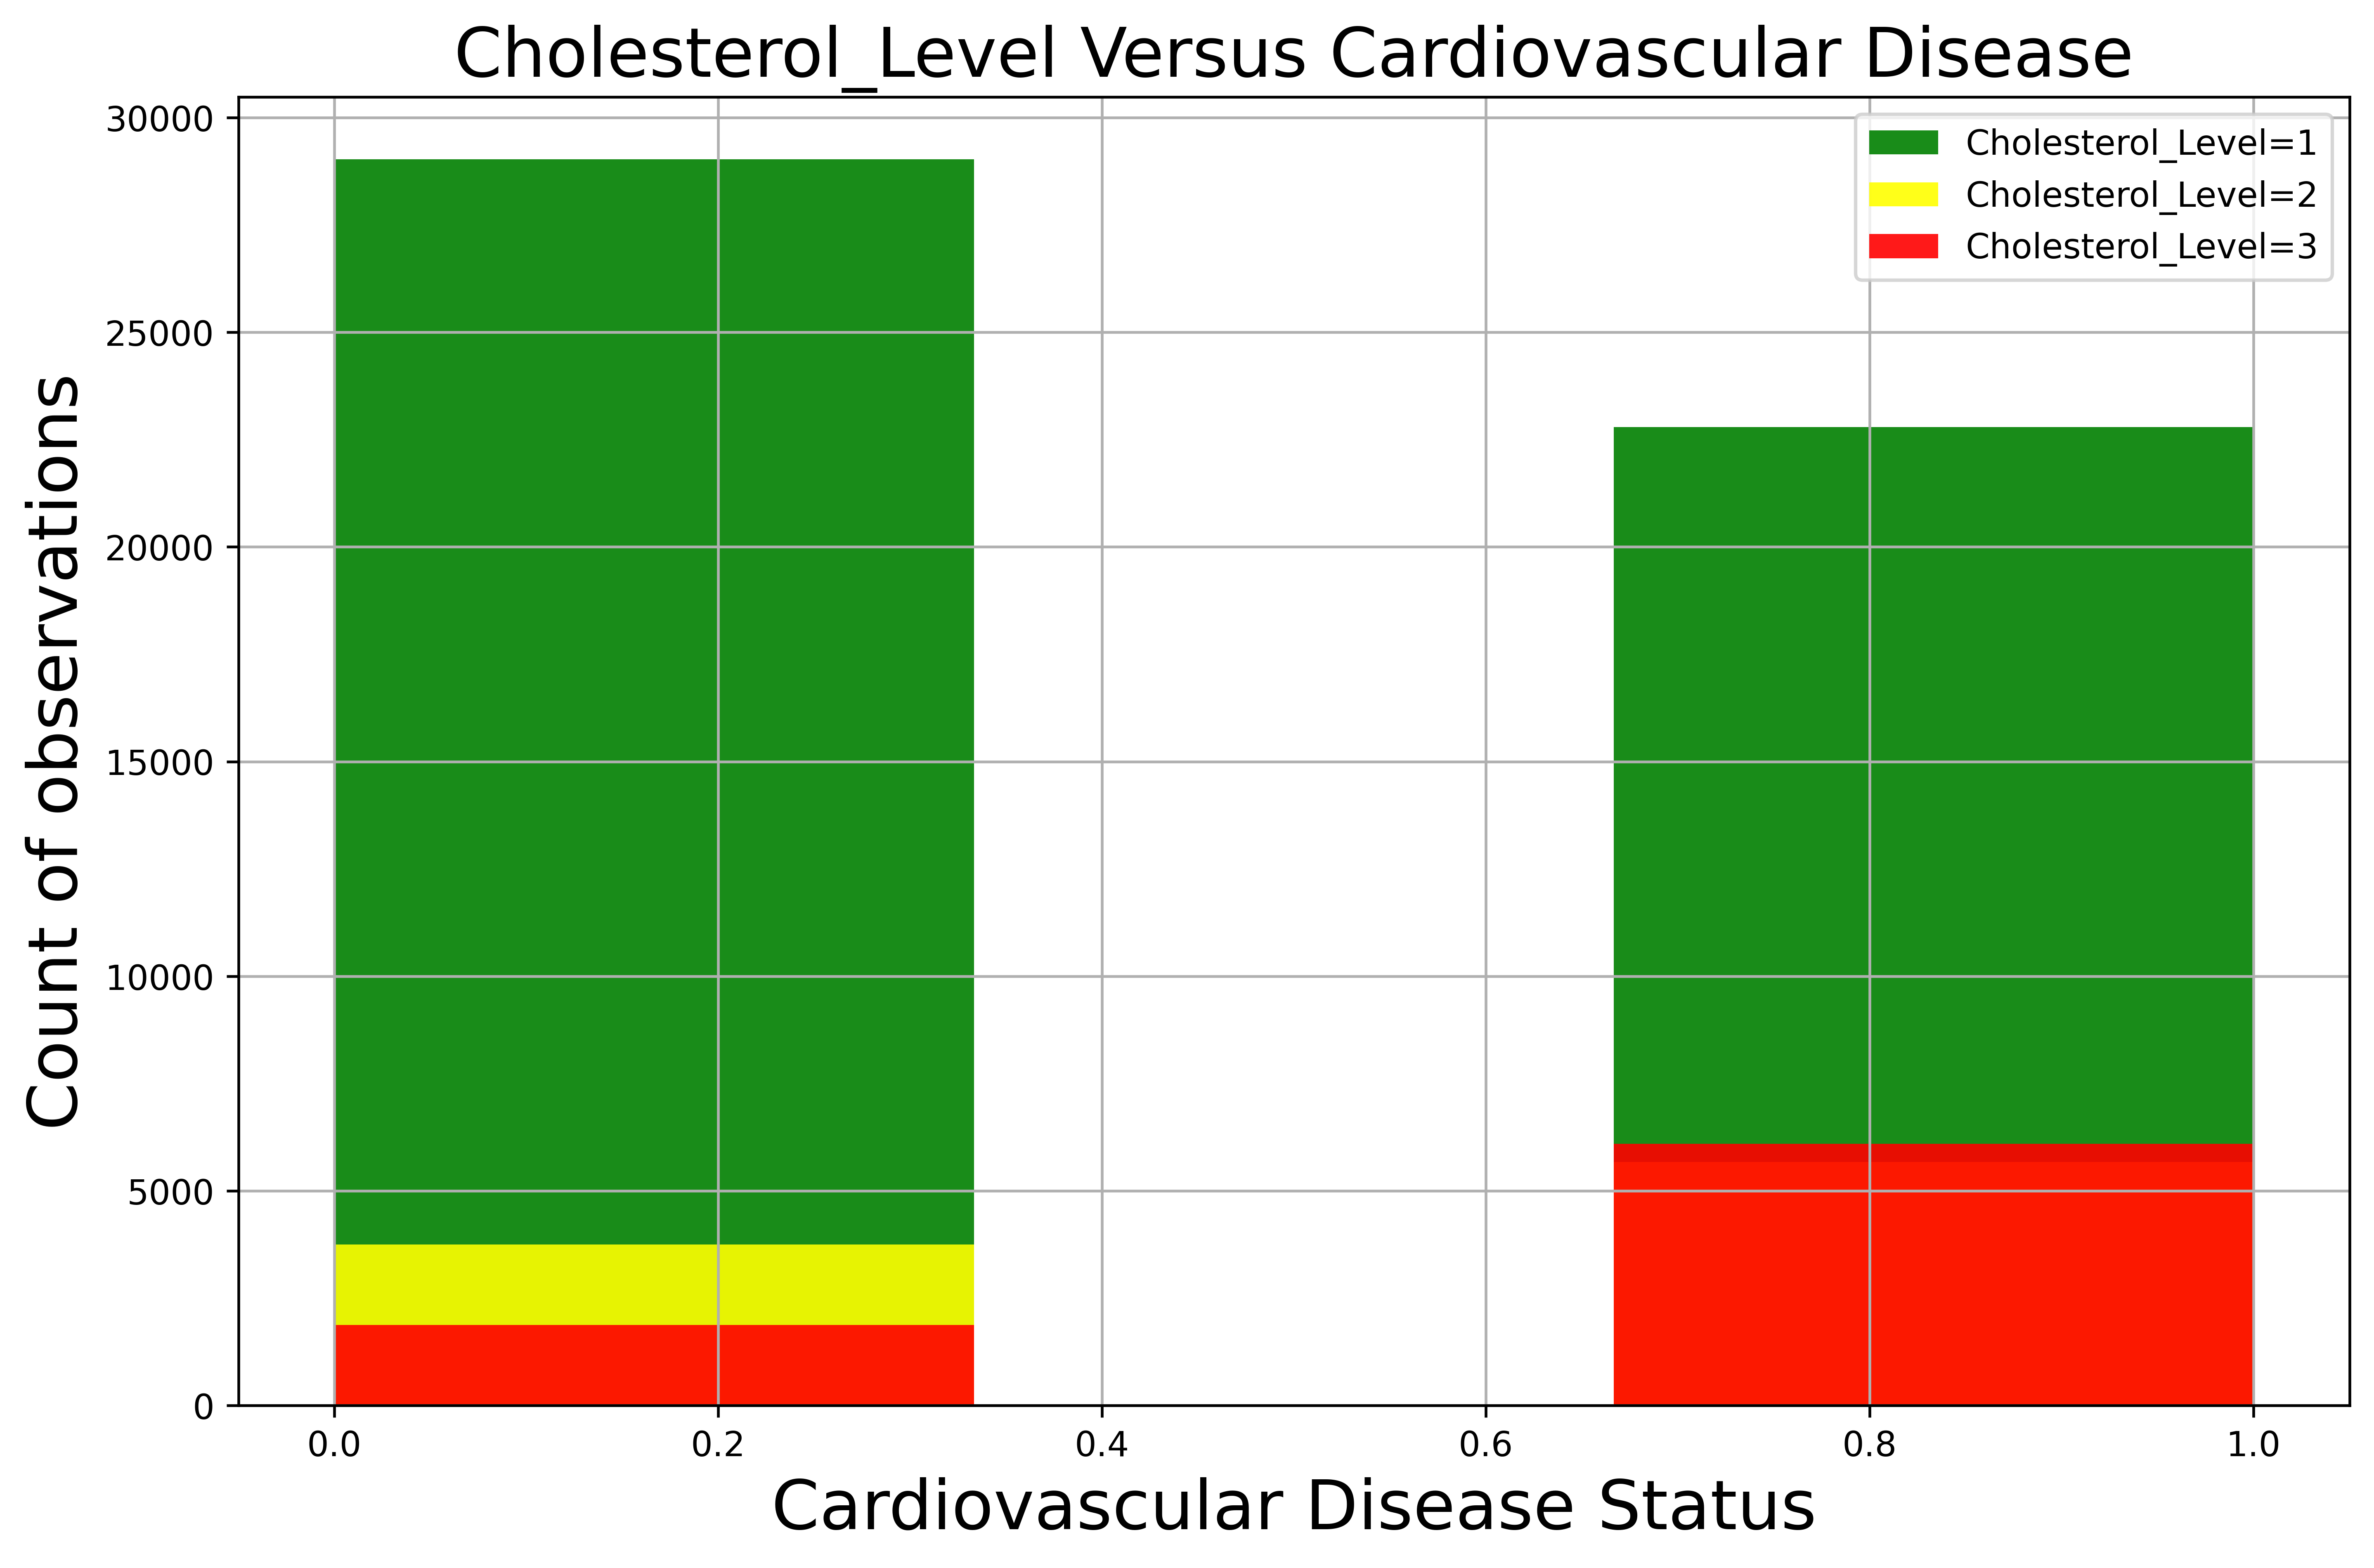

In [211]:
plt.figure(figsize=(11,7), dpi=600)
df_class[df_class['Cholesterol_Level']==1]['CVD_Patient'].hist(alpha=0.9,color='green',
                                              bins=3,label='Cholesterol_Level=1')
df_class[df_class['Cholesterol_Level']==2]['CVD_Patient'].hist(alpha=0.9,color='yellow',
                                              bins=3,label='Cholesterol_Level=2')
df_class[df_class['Cholesterol_Level']==3]['CVD_Patient'].hist(alpha=0.9,color='red',
                                              bins=3,label='Cholesterol_Level=3')
plt.legend()
plt.title("Cholesterol_Level Versus Cardiovascular Disease", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Cardiovascular Disease Status", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("Cholesterol_LevelVCVD_Patient.png",dpi=600)

In [212]:
chi_square("Cholesterol_Level",'CVD_Patient')

[[25945.55561336 25865.44438664]
 [ 4716.78192512  4702.21807488]
 [ 3991.66246153  3979.33753847]]

Chi-square is : 3368.8478960096336 

p_value is : 0.0 

degree of freedom is :2

There is some correlation between the two variables at 0.05 significant level


In [61]:
contingency_table6 = pd.crosstab(df_class['Glucose_Level'],df_class['CVD_Patient'],margins = True)
contingency_table6

CVD_Patient        0      1    All
Glucose_Level                     
1              30590  28295  58885
2               2091   3048   5139
3               1998   3279   5277
All            34679  34622  69301

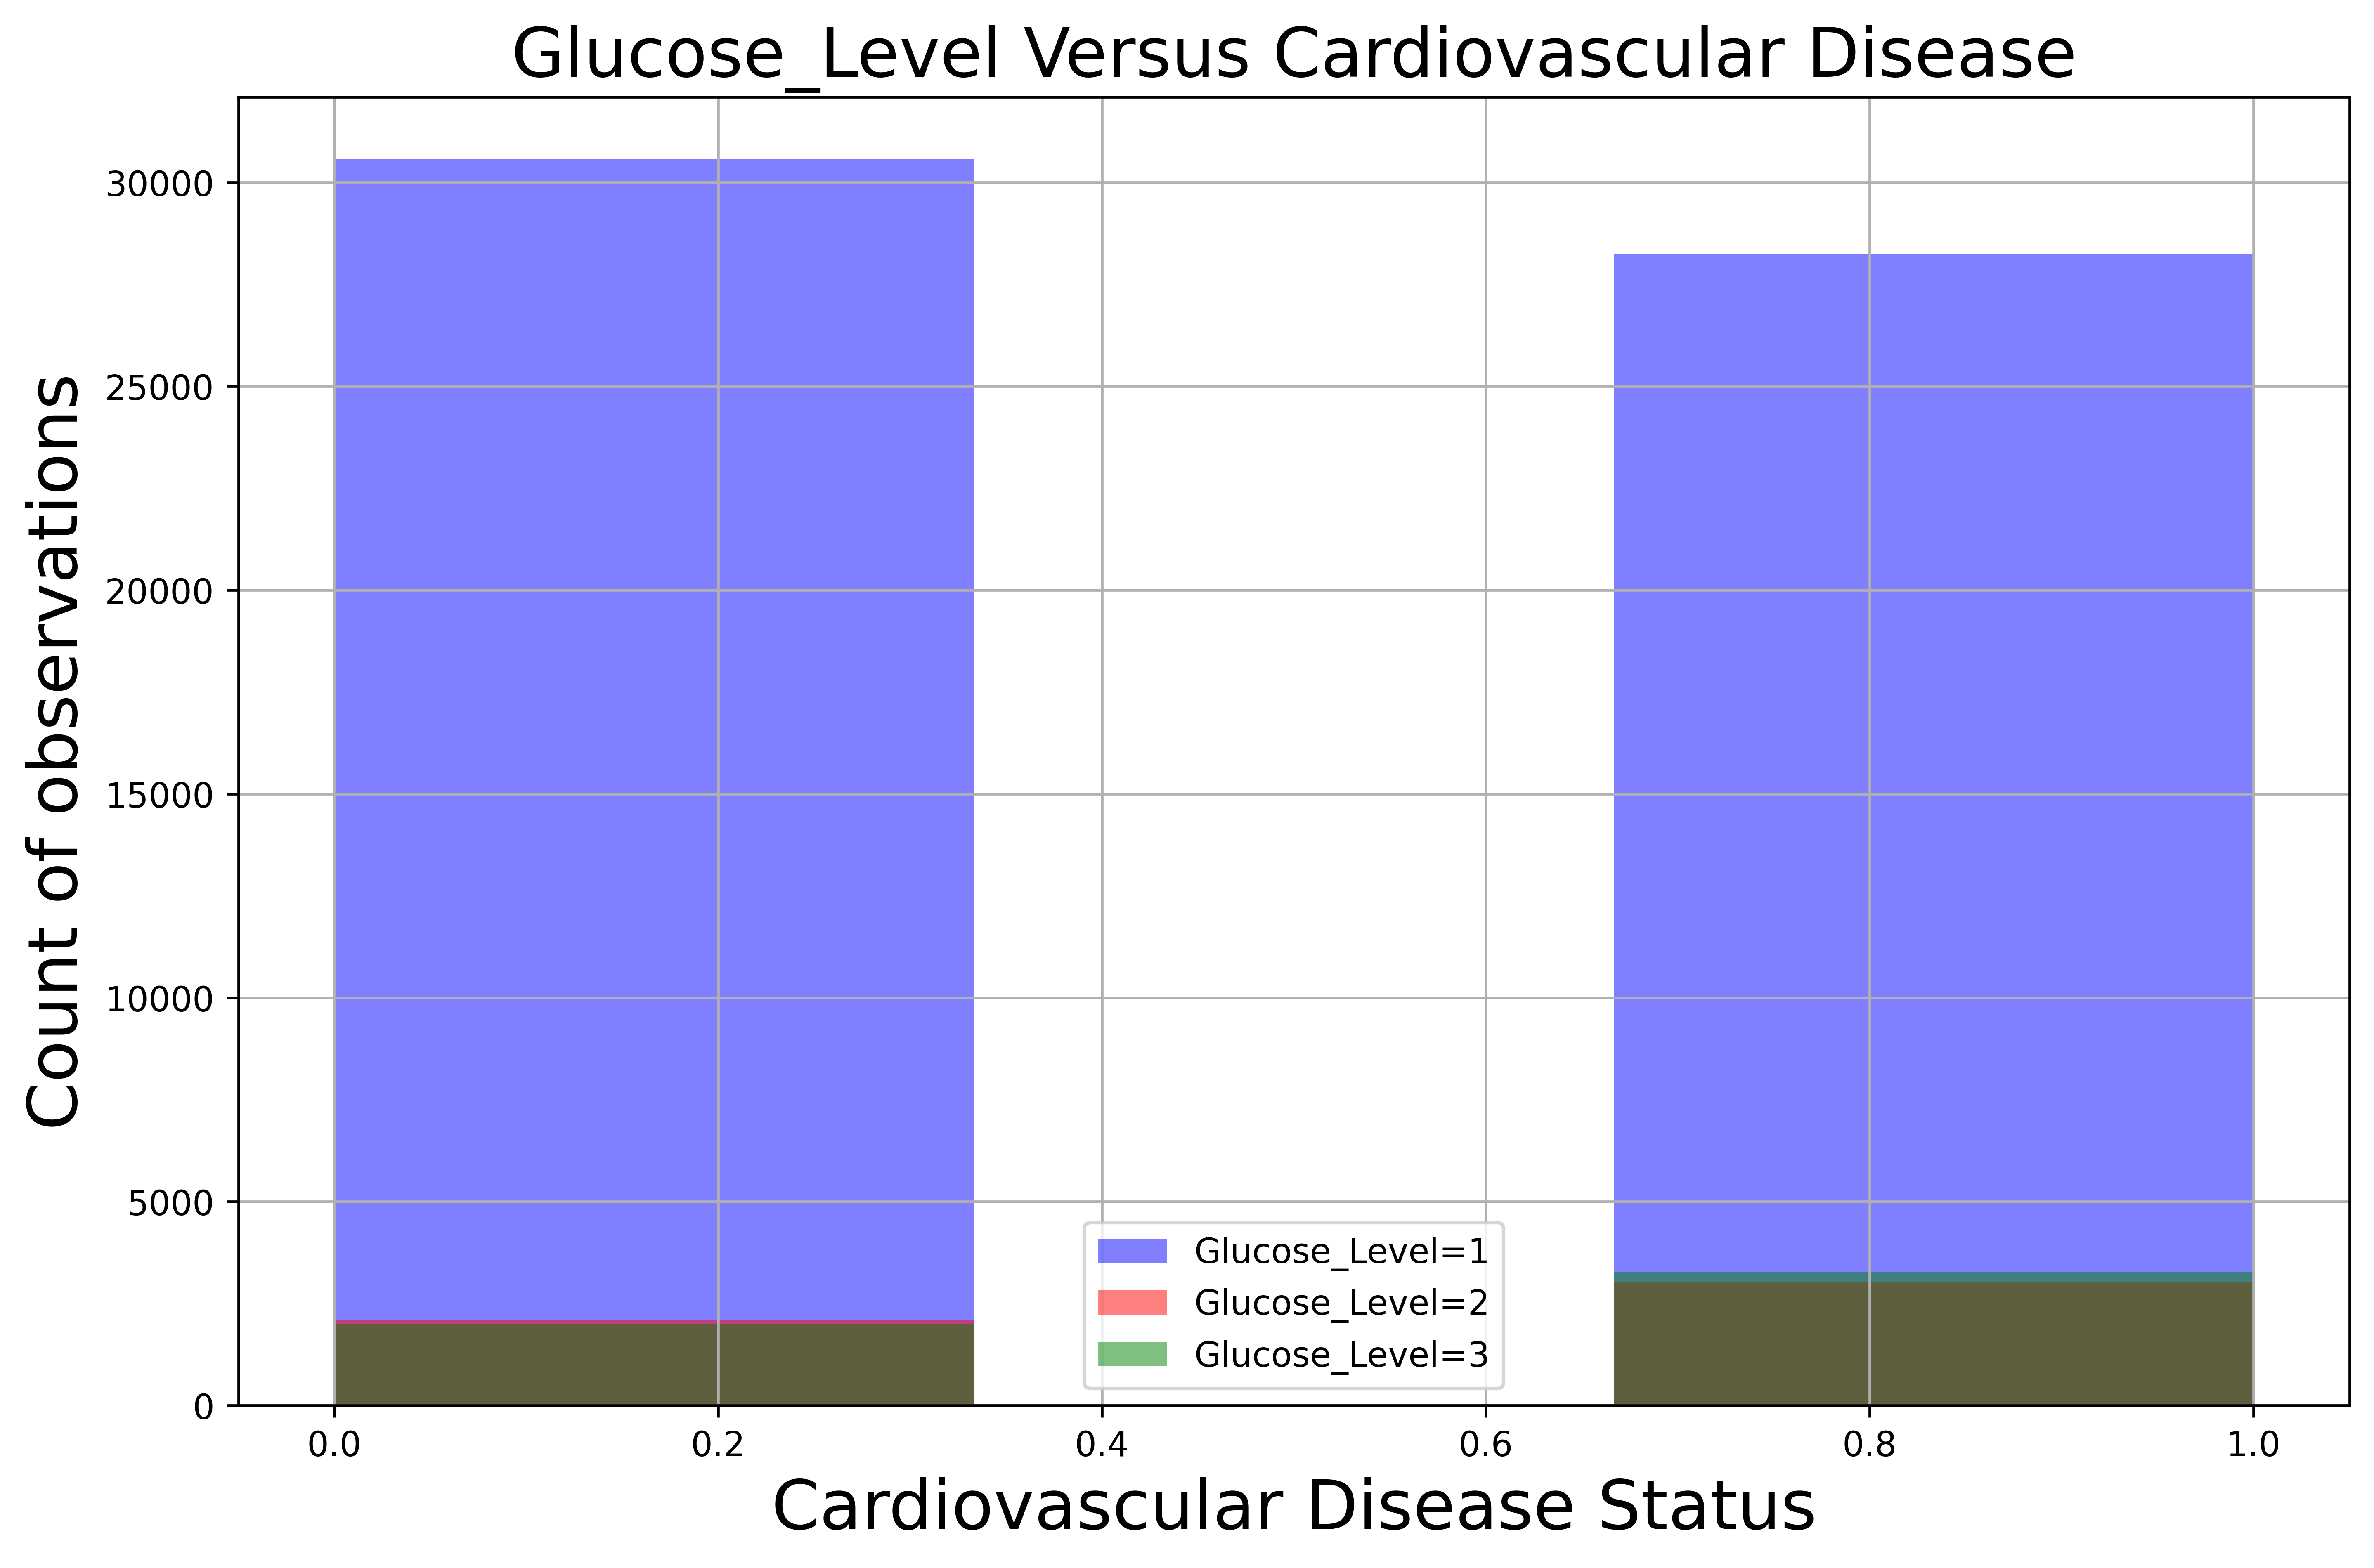

In [195]:
plt.figure(figsize=(11,7), dpi=600)
df_class[df_class['Glucose_Level']==1]['CVD_Patient'].hist(alpha=0.5,color='blue',
                                              bins=3,label='Glucose_Level=1')
df_class[df_class['Glucose_Level']==2]['CVD_Patient'].hist(alpha=0.5,color='red',
                                              bins=3,label='Glucose_Level=2')
df_class[df_class['Glucose_Level']==3]['CVD_Patient'].hist(alpha=0.5,color='green',
                                              bins=3,label='Glucose_Level=3')
plt.legend()
plt.title("Glucose_Level Versus Cardiovascular Disease", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Cardiovascular Disease Status", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("Glucose_LevelVCVD_Patient.png",dpi=600)

In [62]:
chi_square("Glucose_Level",'CVD_Patient')

[[29466.71642545 29418.28357455]
 [ 2571.61341106  2567.38658894]
 [ 2640.67016349  2636.32983651]]

Chi-square is : 578.5796272085297 

p_value is : 2.306908030494408e-126 

degree of freedom is :2

There is some correlation between the two variables at 0.05 significant level


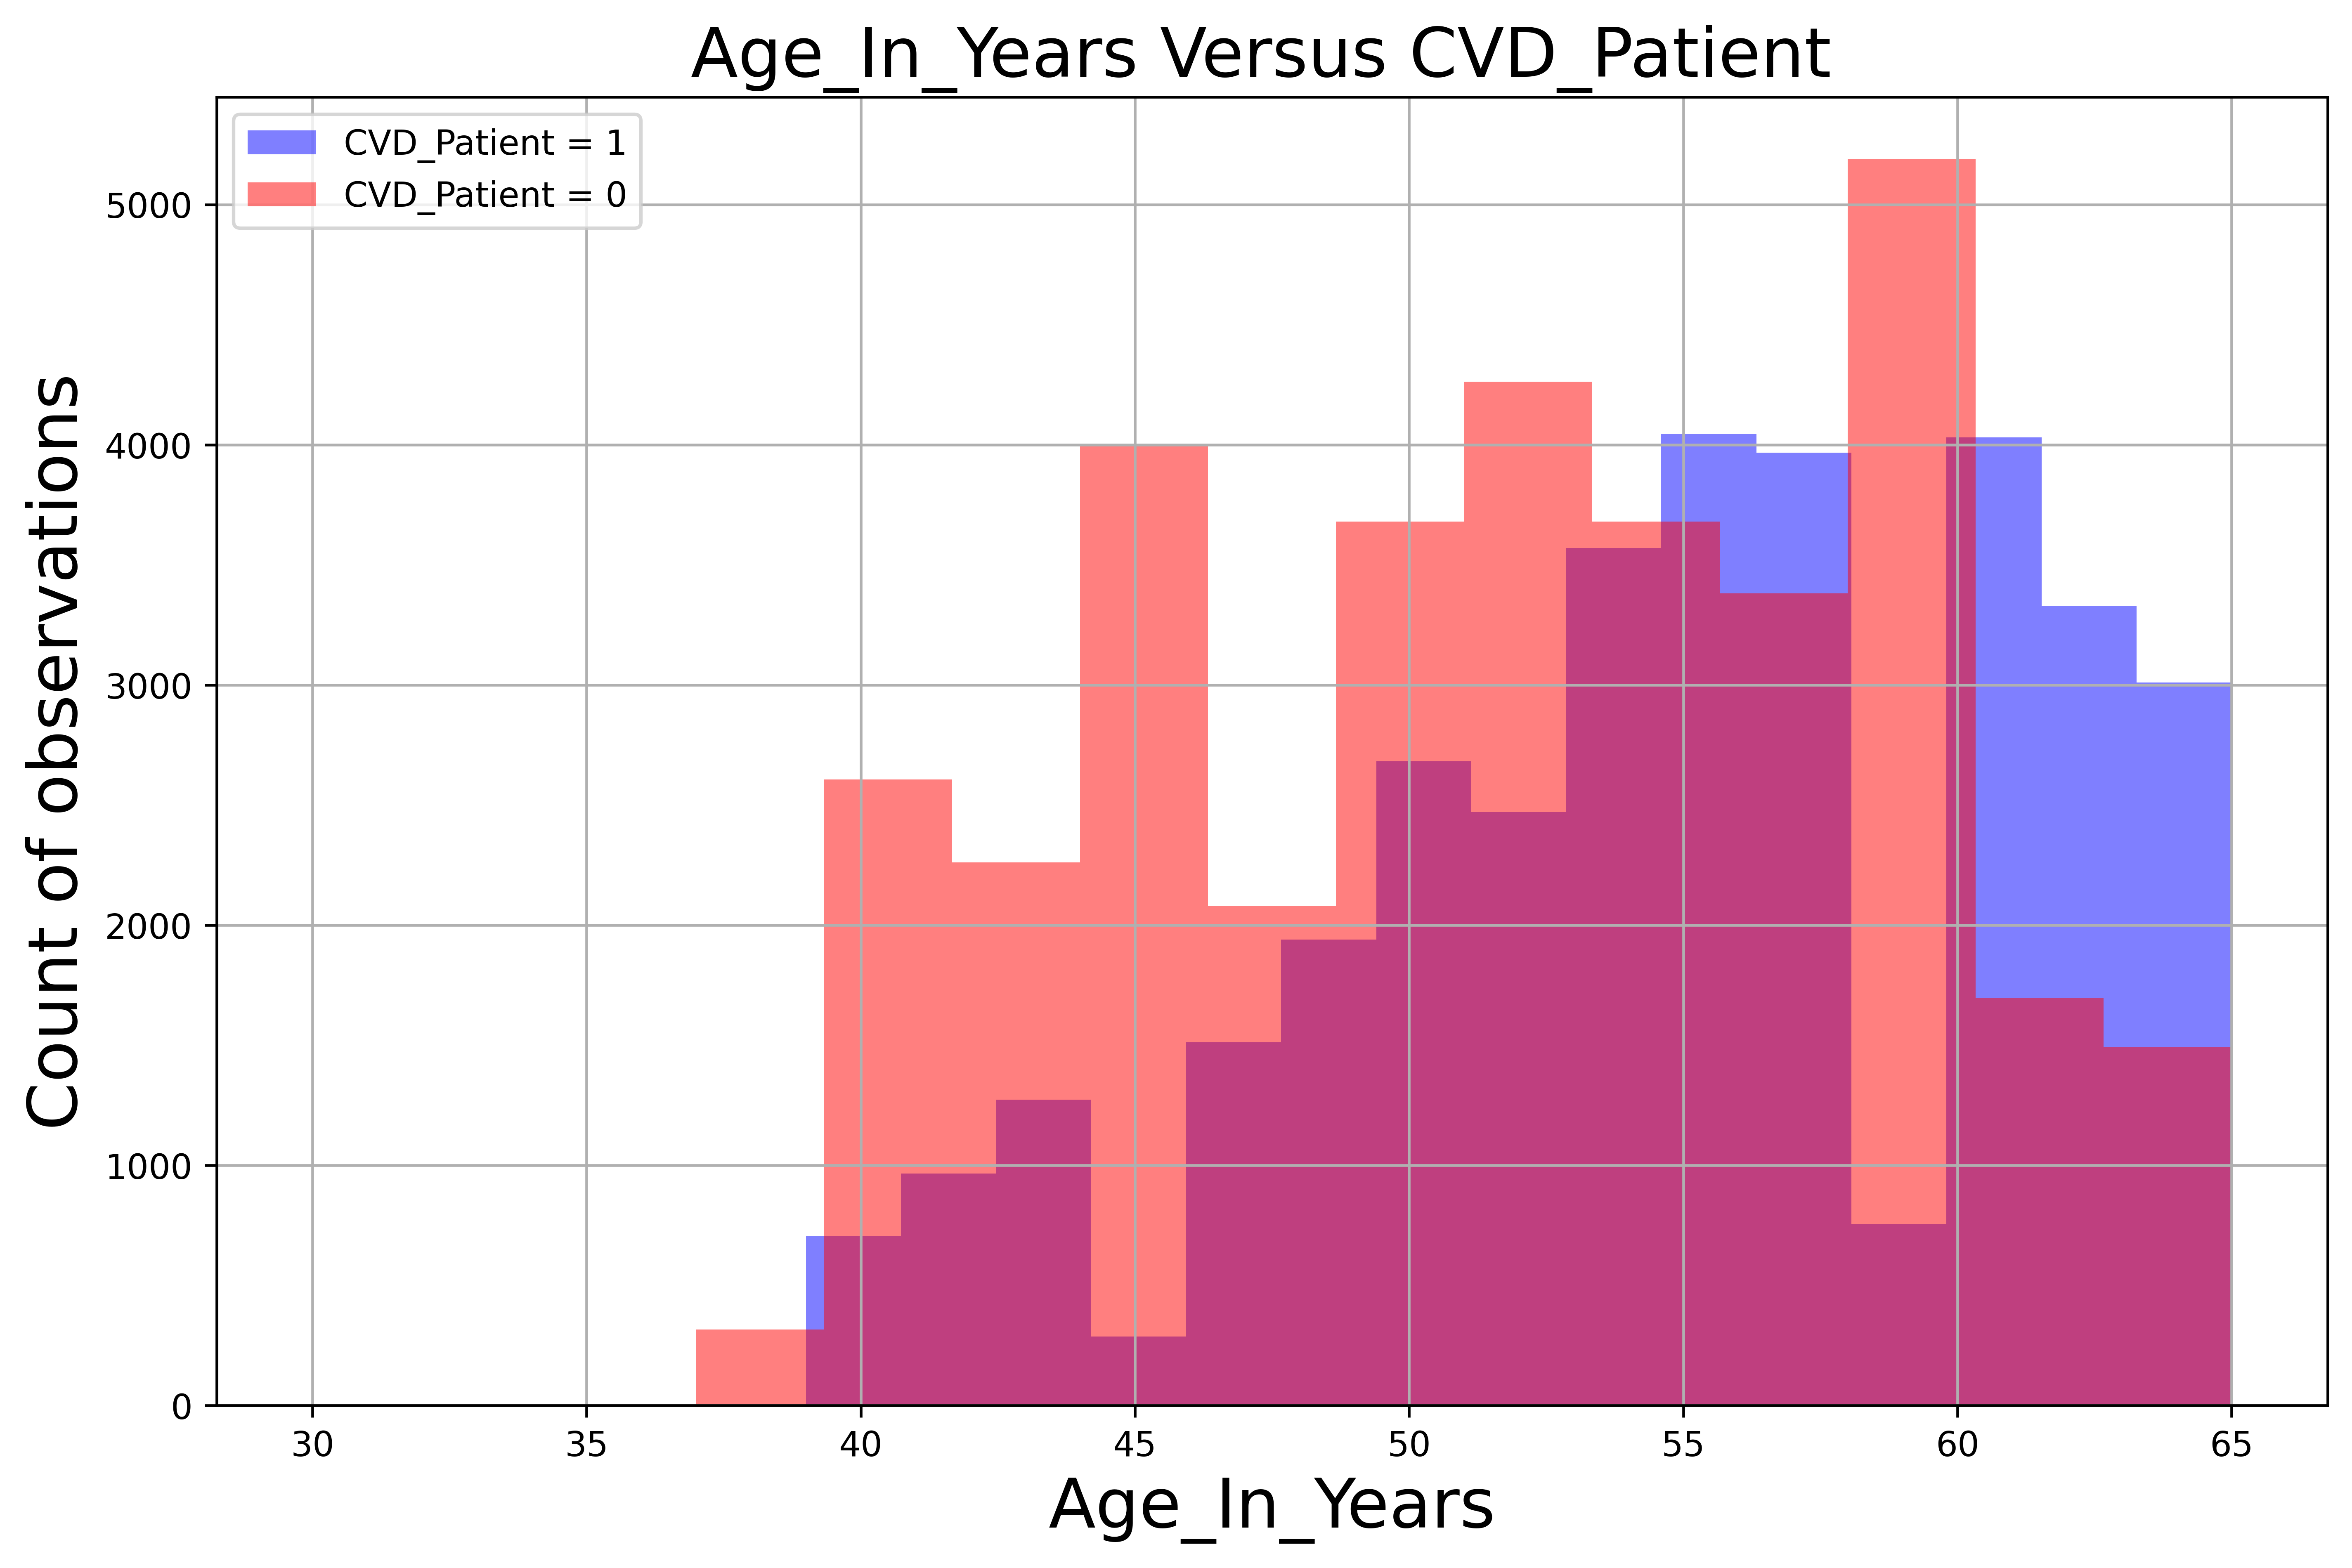

In [200]:
plt.figure(figsize=(11,7), dpi=600)
df[df['CVD_Patient']== 1 ]['Age_In_Years'].hist(alpha=0.5,color='blue',
                                              bins=15,label='CVD_Patient = 1')
df[df['CVD_Patient']== 0 ]['Age_In_Years'].hist(alpha=0.5,color='red',
                                              bins=15,label='CVD_Patient = 0')
plt.legend()
plt.title("Age_In_Years Versus CVD_Patient ", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Age_In_Years", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("DistributionofAge_In_DaysVCVD_Patient.png",dpi=600)

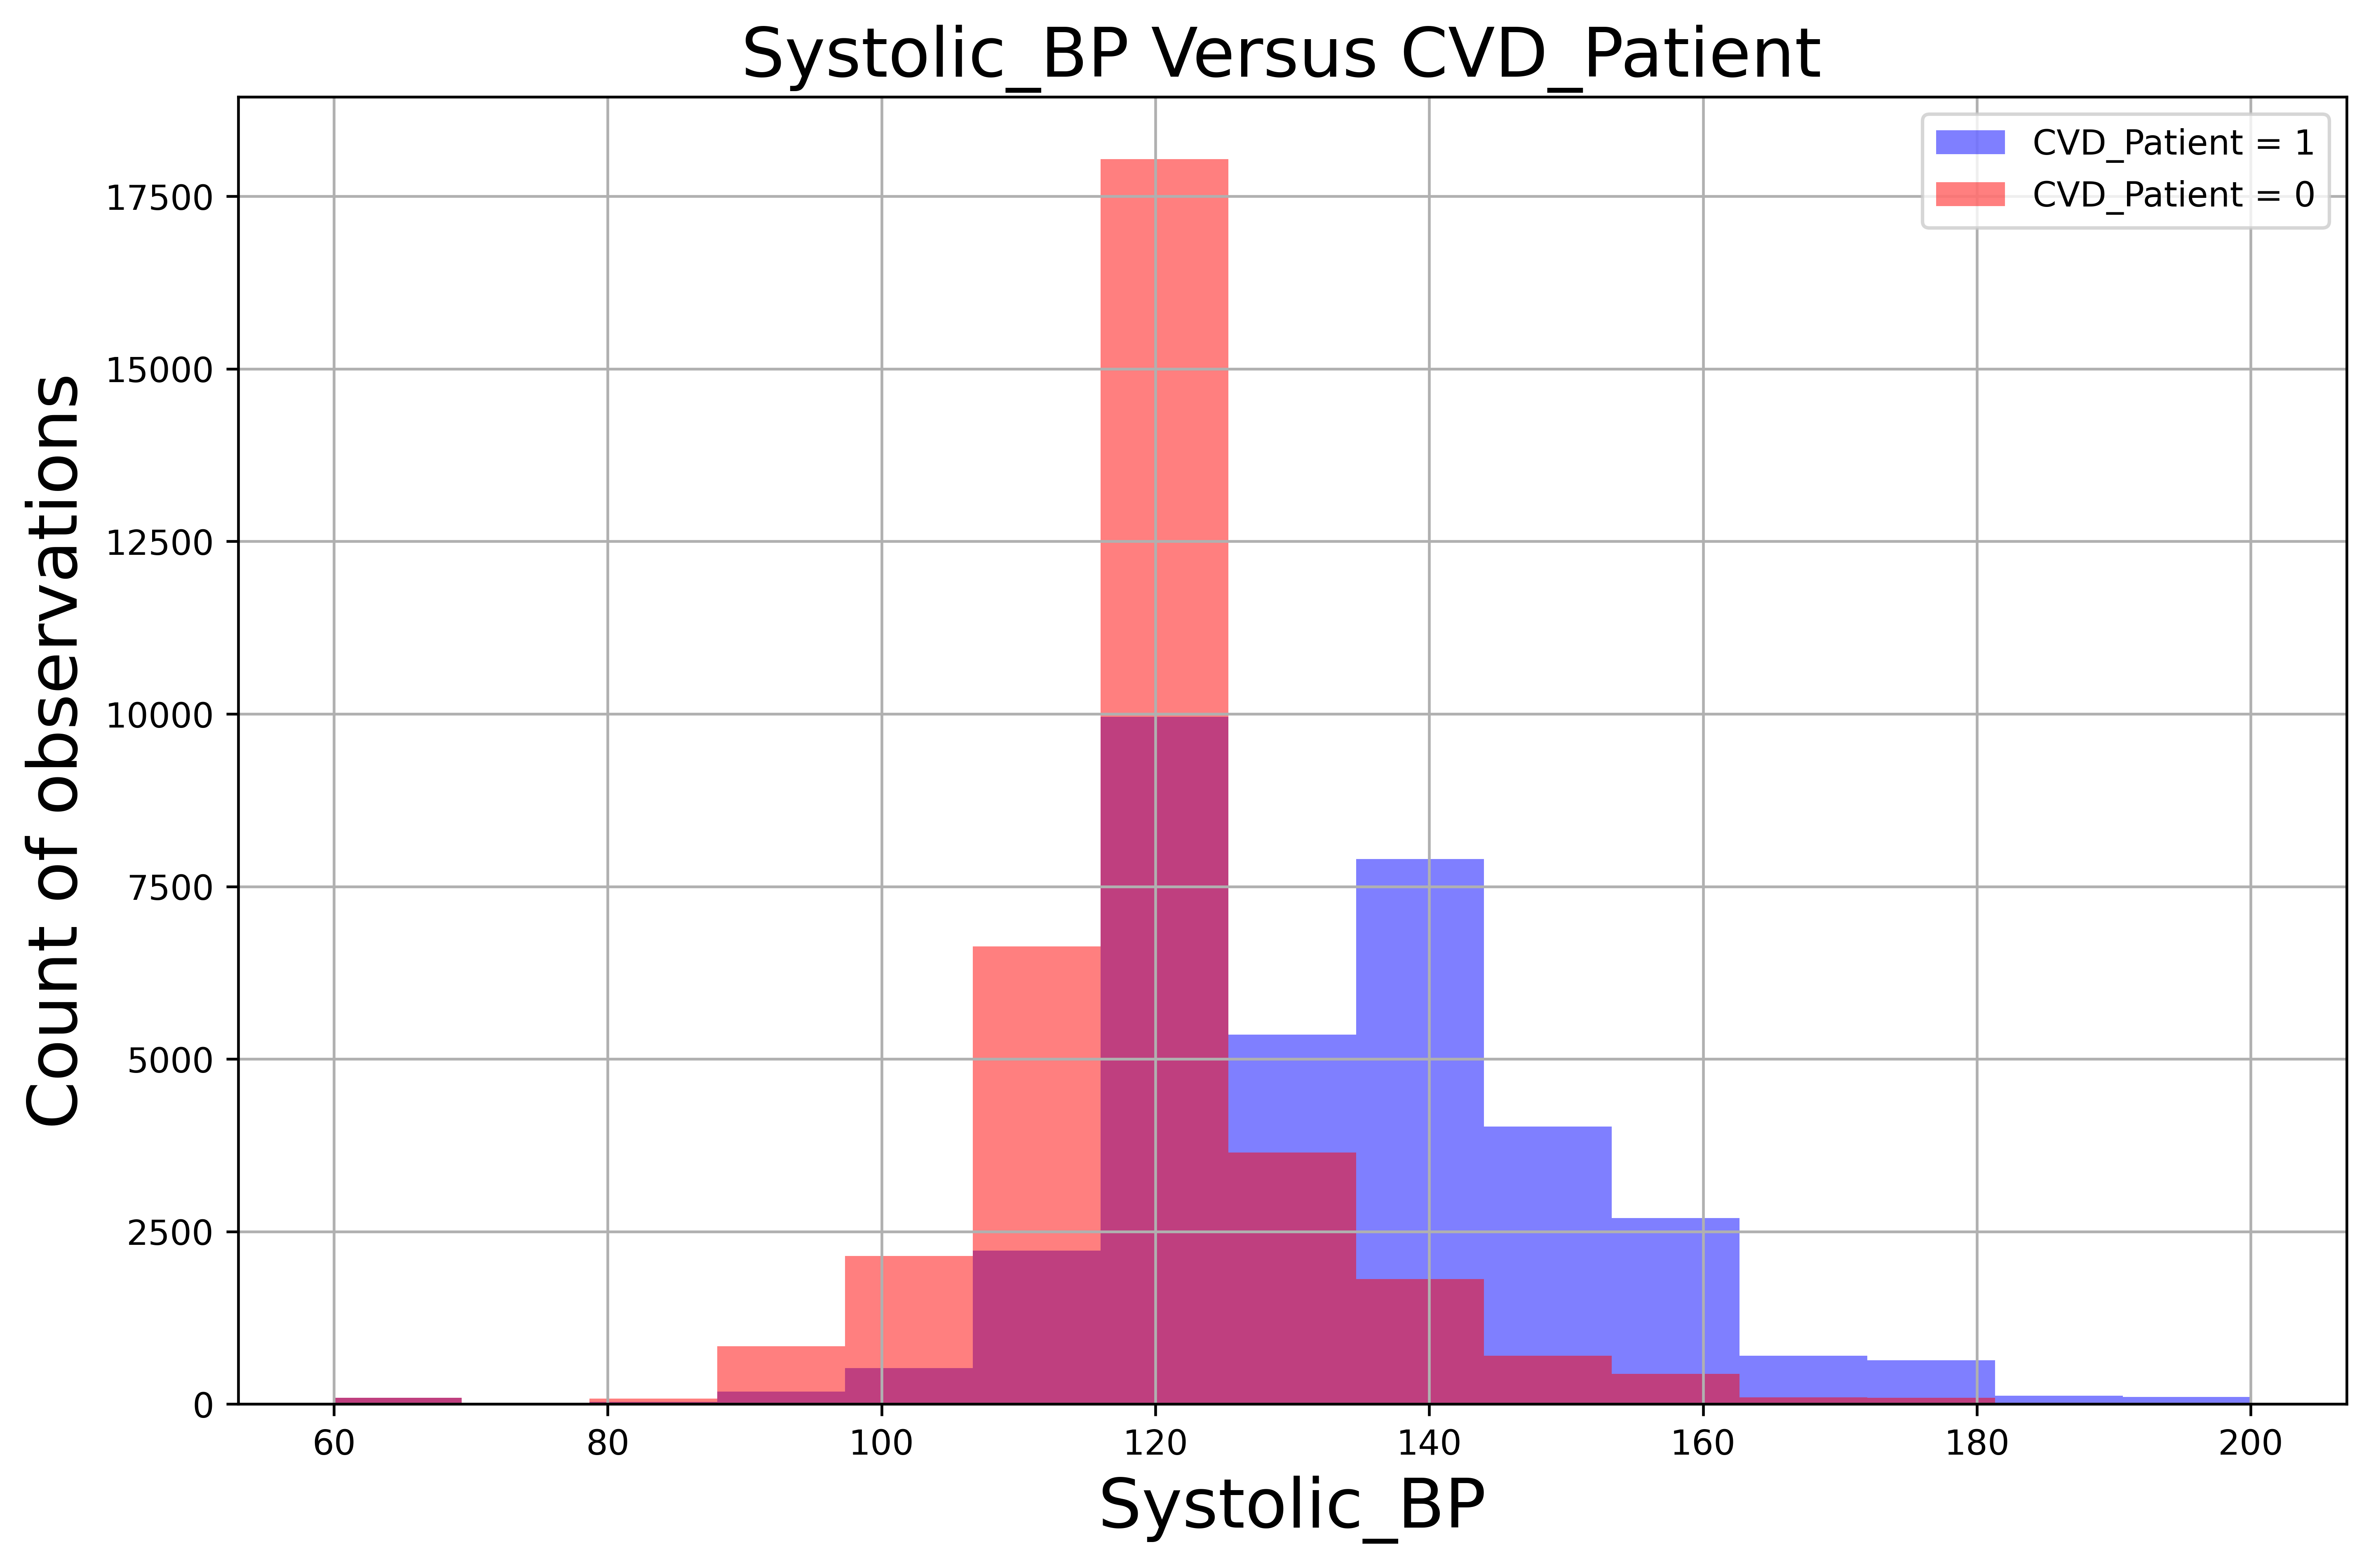

In [201]:
plt.figure(figsize=(11,7), dpi=600)
df[df['CVD_Patient']== 1 ]['Systolic_BP'].hist(alpha=0.5,color='blue',
                                              bins=15,label='CVD_Patient = 1')
df[df['CVD_Patient']== 0 ]['Systolic_BP'].hist(alpha=0.5,color='red',
                                              bins=15,label='CVD_Patient = 0')
plt.legend()
plt.title("Systolic_BP Versus CVD_Patient ", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Systolic_BP", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("Systolic_BPVCVD_Patient.png",dpi=600)

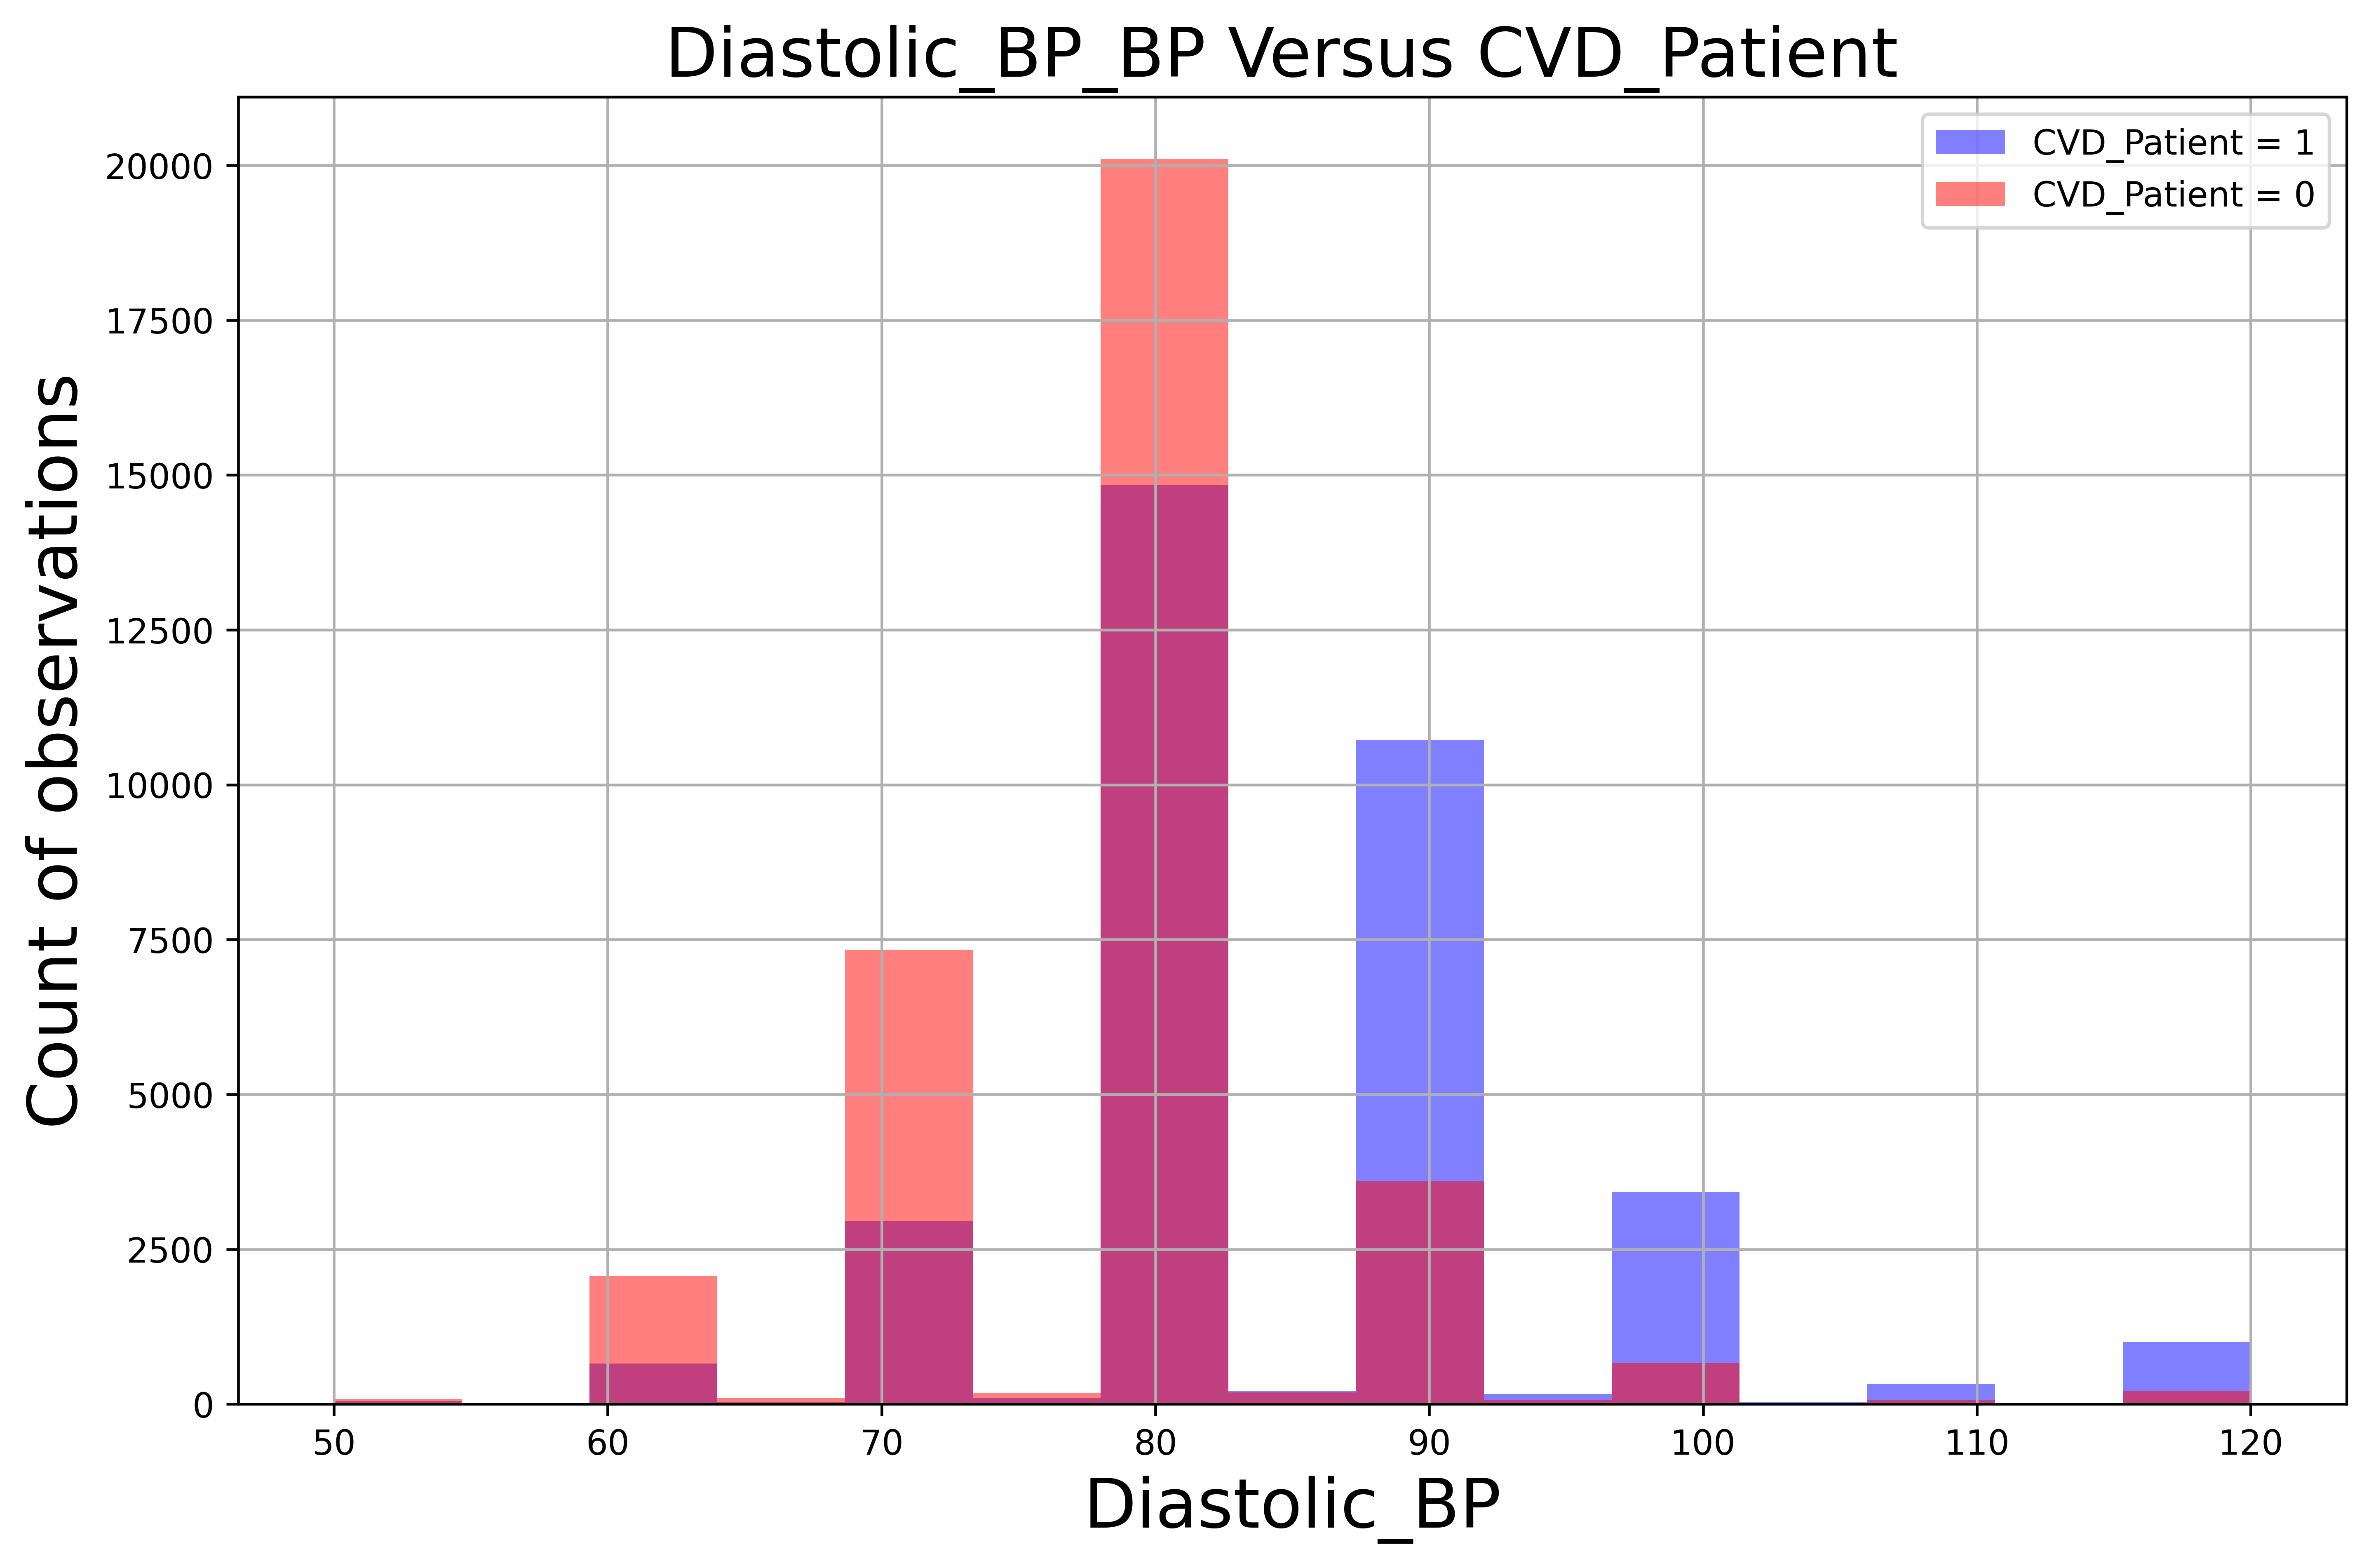

In [202]:
plt.figure(figsize=(11,7), dpi=600)
df[df['CVD_Patient']== 1 ]['Diastolic_BP'].hist(alpha=0.5,color='blue',
                                              bins=15,label='CVD_Patient = 1')
df[df['CVD_Patient']== 0 ]['Diastolic_BP'].hist(alpha=0.5,color='red',
                                              bins=15,label='CVD_Patient = 0')
plt.legend()
plt.title("Diastolic_BP_BP Versus CVD_Patient ", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Diastolic_BP", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("Diastolic_BPVCVD_Patient.png",dpi=600)

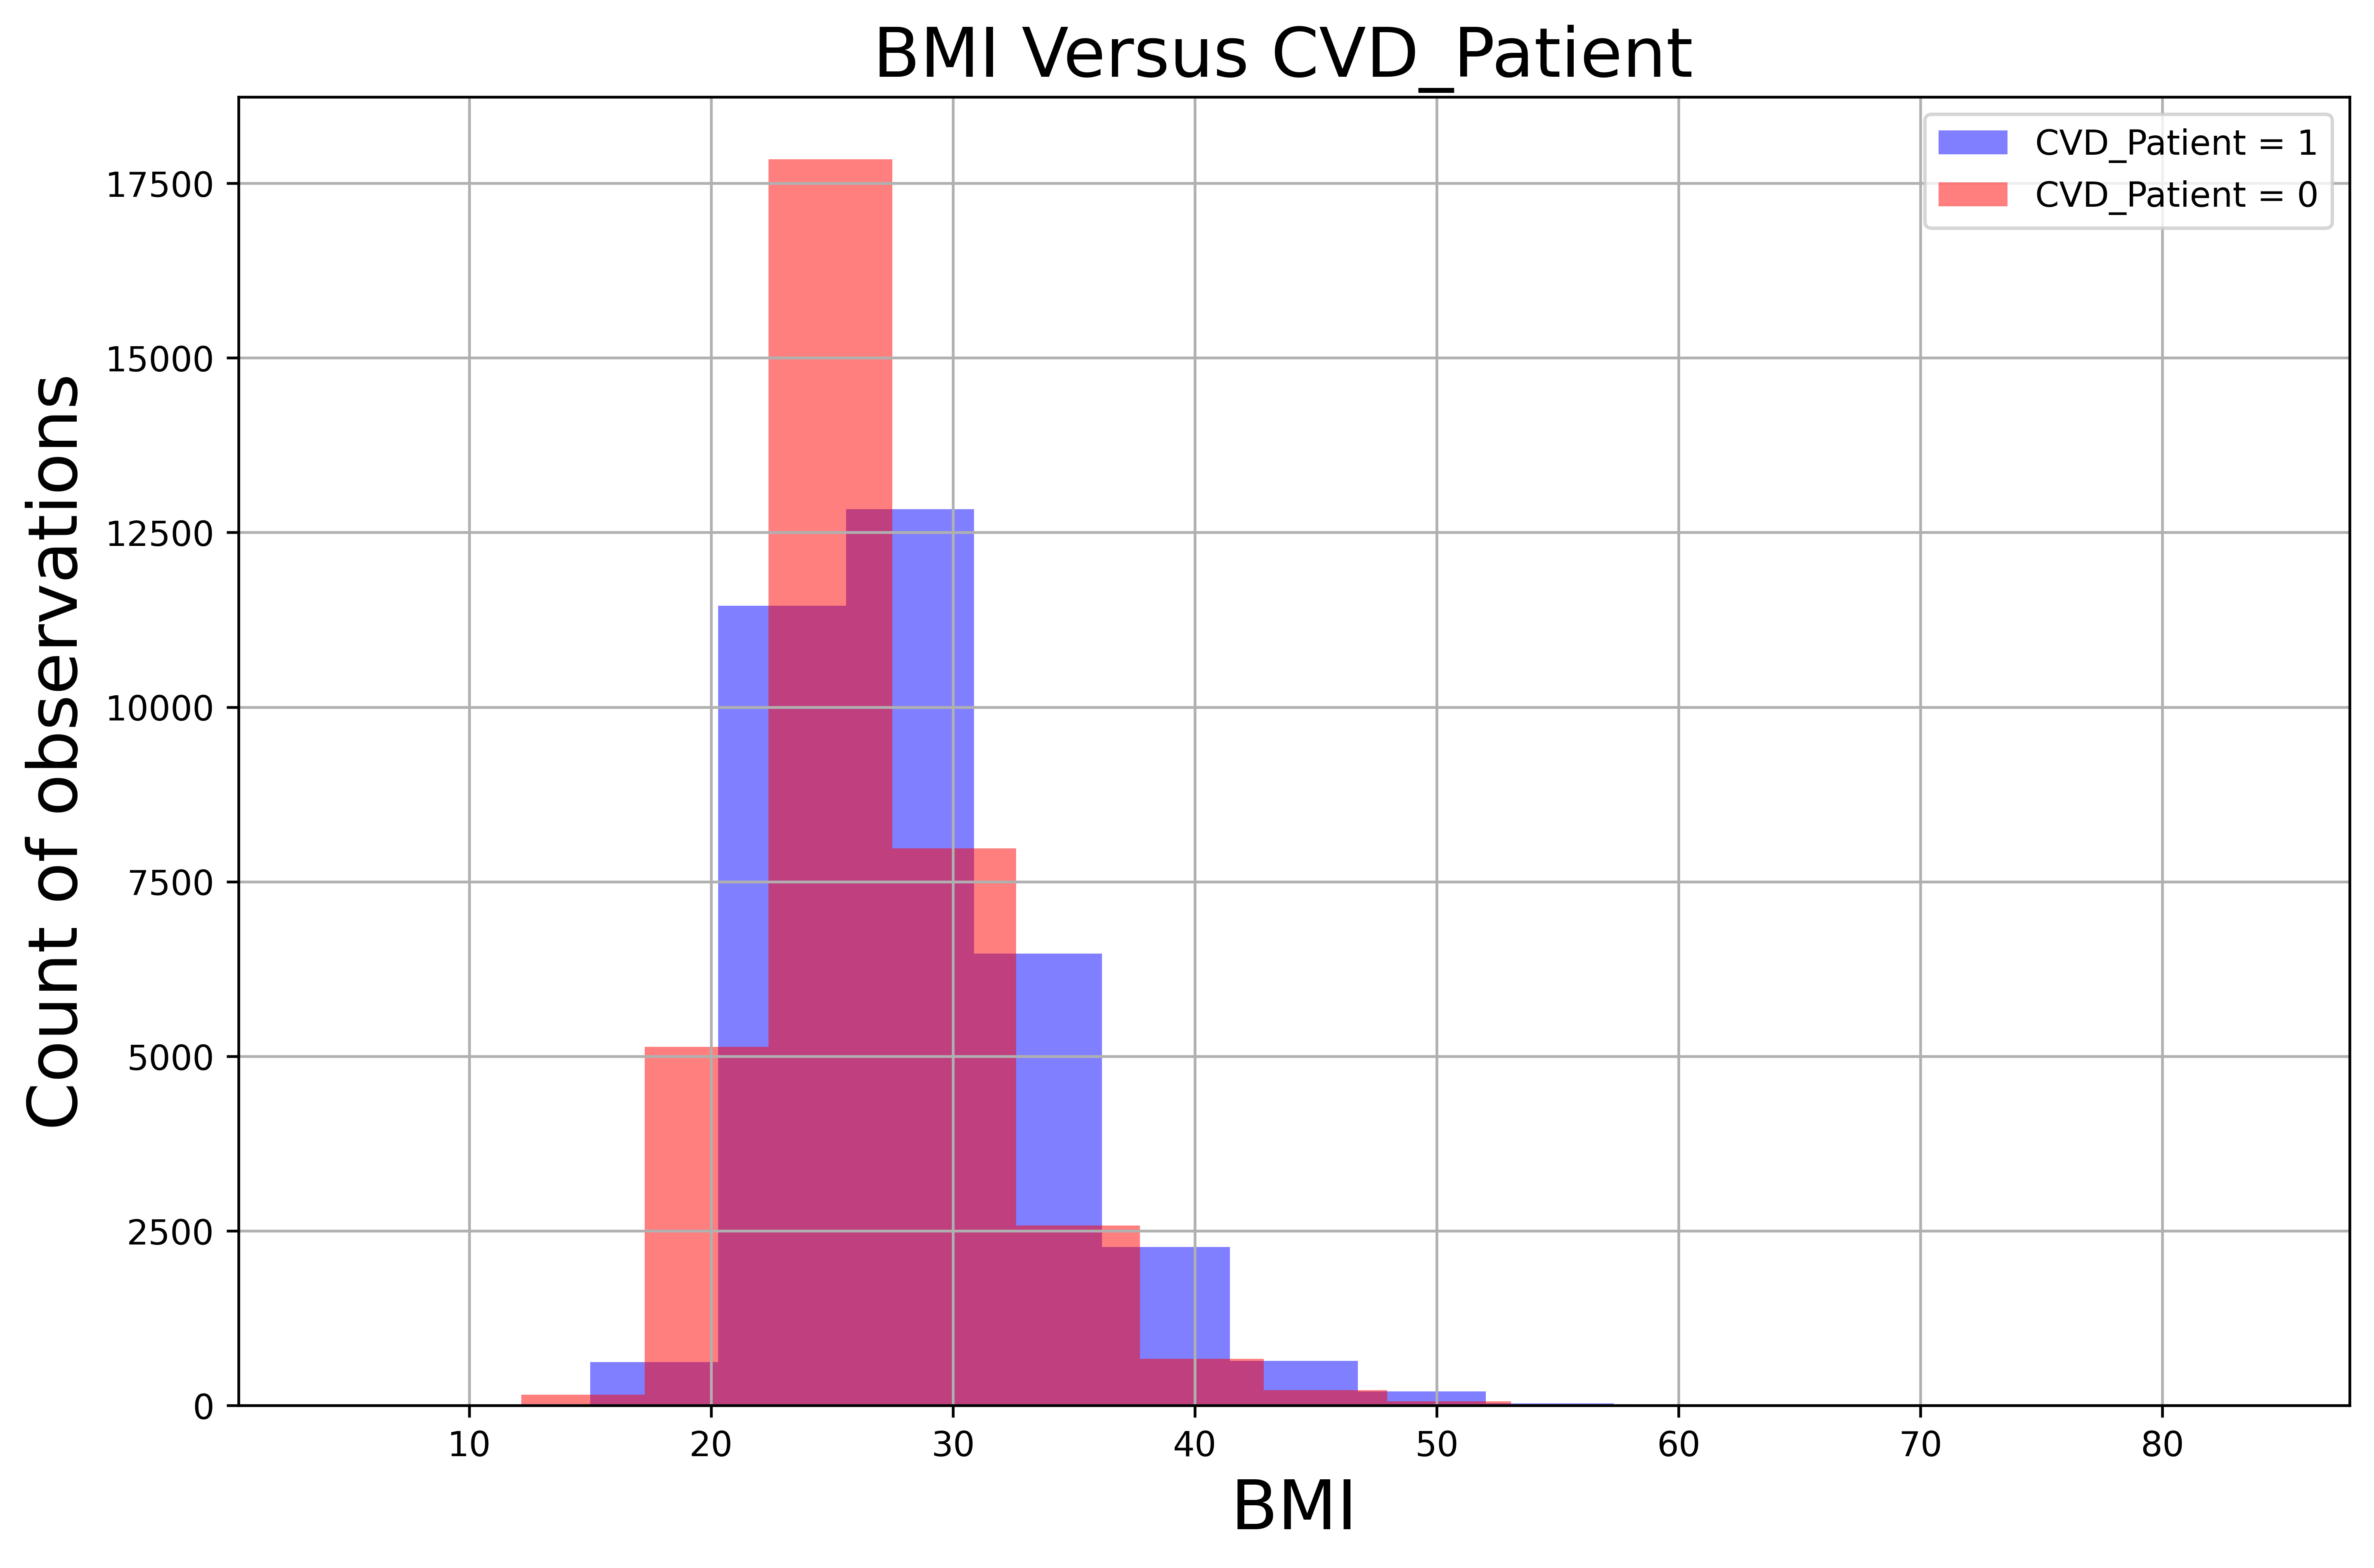

In [204]:
plt.figure(figsize=(11,7), dpi=600)
df_class[df_class['CVD_Patient']== 1 ]['BMI'].hist(alpha=0.5,color='blue',
                                              bins=15,label='CVD_Patient = 1')
df_class[df_class['CVD_Patient']== 0 ]['BMI'].hist(alpha=0.5,color='red',
                                              bins=15,label='CVD_Patient = 0')
plt.legend()
plt.title("BMI Versus CVD_Patient ", fontsize=20)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("BMI", fontsize=20)
plt.ylabel("Count of observations", fontsize=20)
plt.savefig("BMIVD_Patient.png",dpi=600)

# Cleaning of Data

In [63]:
df_class.Age_In_Days = df_class.Age_In_Days.apply(lambda x: round(x/365))

In [64]:
df_class.head()

Identification_Number  Age_In_Days  Gender  Height  Weight  Systolic_BP  \
0                    988           62       1     155   69.00          130   
1                    989           40       1     163   71.00          110   
2                    990           60       1     165   70.00          120   
3                    991           40       2     165   85.00          120   
4                    992           64       1     155   62.00          120   

   Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  Drinker  \
0            80                  2              2       0        0   
1            70                  1              1       0        0   
2            80                  1              1       0        0   
3            80                  1              1       1        1   
4            80                  1              1       0        0   

   Physically_Active  CVD_Patient  
0                  1            0  
1                  1            1  
2                  1            0  
3                  1            0  
4                  1            0

In [65]:
df_class=df_class.rename(columns={'Age_In_Days':'Age_In_Years'})

In [66]:
df_class.head()

Identification_Number  Age_In_Years  Gender  Height  Weight  Systolic_BP  \
0                    988            62       1     155   69.00          130   
1                    989            40       1     163   71.00          110   
2                    990            60       1     165   70.00          120   
3                    991            40       2     165   85.00          120   
4                    992            64       1     155   62.00          120   

   Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  Drinker  \
0            80                  2              2       0        0   
1            70                  1              1       0        0   
2            80                  1              1       0        0   
3            80                  1              1       1        1   
4            80                  1              1       0        0   

   Physically_Active  CVD_Patient  
0                  1            0  
1                  1            1  
2                  1            0  
3                  1            0  
4                  1            0

In [67]:
df_class.Systolic_BP = df_class.Systolic_BP.apply(lambda x: abs(x))

In [68]:
df_class['Systolic_BP'].describe()

count   69301.00
mean      128.85
std       154.76
min         1.00
25%       120.00
50%       120.00
75%       140.00
max     16020.00
Name: Systolic_BP, dtype: float64

<AxesSubplot:ylabel='Systolic_BP'>

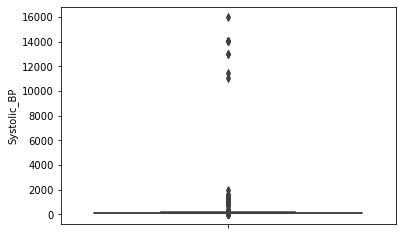

In [69]:
sns.boxplot( y=df_class['Systolic_BP'] )

Text(0.5, 0, 'Systolic Blood Pressure in mm of Hg')

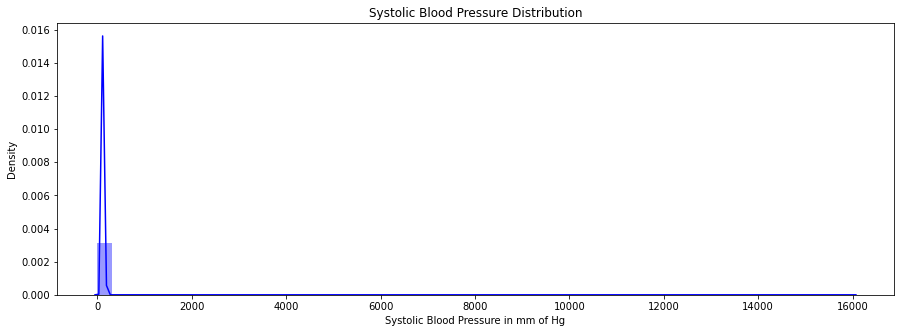

In [70]:
plt.figure(figsize=(15,5))
sns.distplot(df_class["Systolic_BP"], color="blue")
plt.title("Systolic Blood Pressure Distribution")
plt.ylabel("Density")
plt.xlabel("Systolic Blood Pressure in mm of Hg")

In [72]:
sys_200_plus =df_class[(df_class['Systolic_BP']>200)]
sys_200_plus.describe()

Identification_Number  Age_In_Years  Gender  Height  Weight  \
count                 100.00        100.00  100.00  100.00  100.00   
mean                53561.87         54.24    1.47  166.16   80.52   
std                 27958.35          6.21    0.50    8.31   18.23   
min                  1863.00         40.00    1.00  145.00   41.00   
25%                 31489.00         50.00    1.00  160.00   68.00   
50%                 59703.50         55.50    1.00  166.00   78.00   
75%                 74235.75         58.00    2.00  173.00   90.50   
max                 99089.00         64.00    2.00  186.00  152.00   

       Systolic_BP  Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  \
count       100.00        100.00             100.00         100.00  100.00   
mean       1676.70        179.80               1.59           1.29    0.08   
std        3757.45        291.07               0.75           0.61    0.27   
min         202.00          0.00               1.00           1.00    0.00   
25%         210.00         80.00               1.00           1.00    0.00   
50%         220.00        110.00               1.00           1.00    0.00   
75%         921.75        120.00               2.00           1.00    0.00   
max       16020.00       1400.00               3.00           3.00    1.00   

       Drinker  Physically_Active  CVD_Patient  
count   100.00             100.00       100.00  
mean      0.06               0.85         0.75  
std       0.24               0.36         0.44  
min       0.00               0.00         0.00  
25%       0.00               1.00         0.75  
50%       0.00               1.00         1.00  
75%       0.00               1.00         1.00  
max       1.00               1.00         1.00

In [76]:
df_class = df_class.drop(df_class[df_class.Systolic_BP > 200].index)

In [77]:
df_class['Systolic_BP'].describe()

count   69201.00
mean      126.62
std        17.84
min         1.00
25%       120.00
50%       120.00
75%       140.00
max       200.00
Name: Systolic_BP, dtype: float64

<AxesSubplot:ylabel='Systolic_BP'>

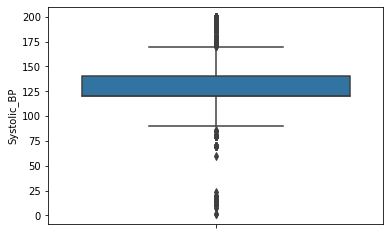

In [78]:
sns.boxplot( y=df_class['Systolic_BP'] )

In [79]:
sys_70_minus =df_class[(df_class['Systolic_BP']< 70)]
sys_70_minus.describe()

Identification_Number  Age_In_Years  Gender  Height  Weight  \
count                 181.00        181.00  181.00  181.00  181.00   
mean                49431.23         52.91    1.34  164.22   73.30   
std                 30130.92          6.82    0.48   11.85   13.05   
min                  1294.00         39.00    1.00   66.00   45.00   
25%                 24690.00         48.00    1.00  160.00   65.00   
50%                 49186.00         54.00    1.00  165.00   70.00   
75%                 77095.00         58.00    2.00  170.00   81.00   
max                 99328.00         65.00    2.00  190.00  115.00   

       Systolic_BP  Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  \
count       181.00        181.00             181.00         181.00  181.00   
mean         12.87         99.27               1.24           1.21    0.05   
std           4.25        171.88               0.54           0.56    0.22   
min           1.00        -70.00               1.00           1.00    0.00   
25%          12.00         80.00               1.00           1.00    0.00   
50%          12.00         80.00               1.00           1.00    0.00   
75%          14.00         90.00               1.00           1.00    0.00   
max          60.00       2088.00               3.00           3.00    1.00   

       Drinker  Physically_Active  CVD_Patient  
count   181.00             181.00       181.00  
mean      0.04               0.76         0.50  
std       0.19               0.43         0.50  
min       0.00               0.00         0.00  
25%       0.00               1.00         0.00  
50%       0.00               1.00         0.00  
75%       0.00               1.00         1.00  
max       1.00               1.00         1.00

# Fixing Outliers

In [80]:
#I want to replace values bigger than upper outer fence with upper outer fence and values less than lower outer fence with
#lower outer fence
#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR
def fixing_outliers(col):#col is name of column that you want to fix its outliers
    i=0 # i is number of outliers that they are less than lower outer fence
    j=0 # j is  number of outliers that they are bigger than upper outer fence
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UOF=Q3+3*(IQR)#UOF=upper outer fence
    LOF=Q1-3*(IQR)#LOF=lower outer fence
    Clean_col=[] # Create a list to assign value
    for val in df[col]:#val is value of that column . here we select values of that column one by one and execute the loop
        if val<LOF:   
            Clean_col.append(LOF)# if value is less than LOF we will repalce that with LOF
            i+=1
        elif val>UOF :  # if value is bigger than UOF we will repalce that with UOF 
            Clean_col.append(UOF)
            j+=1
        else : Clean_col.append(val)
    df[col]=Clean_col # update the column by assigning Clean_col
    sns.distplot(df[col])#Plotting univariate distributions
    print('Number of outliers that they are less than lower outer fence: ',i,'\nNumber of outliers that they are bigger than upper outer fence: ',j)
    return df[col] .describe()

In [81]:
df = df_class

In [82]:
df.head()

Identification_Number  Age_In_Years  Gender  Height  Weight  Systolic_BP  \
0                    988            62       1     155   69.00          130   
1                    989            40       1     163   71.00          110   
2                    990            60       1     165   70.00          120   
3                    991            40       2     165   85.00          120   
4                    992            64       1     155   62.00          120   

   Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  Drinker  \
0            80                  2              2       0        0   
1            70                  1              1       0        0   
2            80                  1              1       0        0   
3            80                  1              1       1        1   
4            80                  1              1       0        0   

   Physically_Active  CVD_Patient  
0                  1            0  
1                  1            1  
2                  1            0  
3                  1            0  
4                  1            0

Number of outliers that they are less than lower outer fence:  180 
Number of outliers that they are bigger than upper outer fence:  0


count   69201.00
mean      126.74
std        17.21
min        60.00
25%       120.00
50%       120.00
75%       140.00
max       200.00
Name: Systolic_BP, dtype: float64

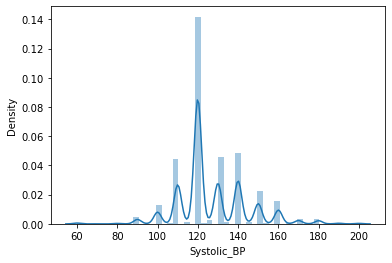

In [84]:
fixing_outliers('Systolic_BP')

<AxesSubplot:ylabel='Systolic_BP'>

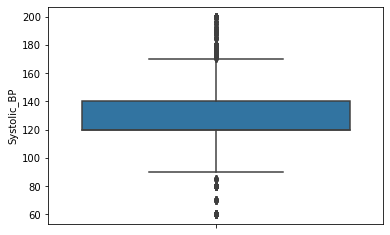

In [213]:
sns.boxplot( y=df_class['Systolic_BP'] )

In [85]:
df.describe()

Identification_Number  Age_In_Years   Gender   Height   Weight  \
count               69201.00      69201.00 69201.00 69201.00 69201.00   
mean                50467.01         53.34     1.35   164.36    74.19   
std                 28563.92          6.77     0.48     8.20    14.38   
min                   988.00         30.00     1.00    55.00    10.00   
25%                 25744.00         48.00     1.00   159.00    65.00   
50%                 50482.00         54.00     1.00   165.00    72.00   
75%                 75150.00         58.00     2.00   170.00    82.00   
max                 99999.00         65.00     2.00   250.00   200.00   

       Systolic_BP  Diastolic_BP  Cholesterol_Level  Glucose_Level   Smoker  \
count     69201.00      69201.00           69201.00       69201.00 69201.00   
mean        126.74         96.53               1.37           1.23     0.09   
std          17.21        188.89               0.68           0.57     0.28   
min          60.00        -70.00               1.00           1.00     0.00   
25%         120.00         80.00               1.00           1.00     0.00   
50%         120.00         80.00               1.00           1.00     0.00   
75%         140.00         90.00               2.00           1.00     0.00   
max         200.00      11000.00               3.00           3.00     1.00   

       Drinker  Physically_Active  CVD_Patient  
count 69201.00           69201.00     69201.00  
mean      0.05               0.80         0.50  
std       0.23               0.40         0.50  
min       0.00               0.00         0.00  
25%       0.00               1.00         0.00  
50%       0.00               1.00         0.00  
75%       0.00               1.00         1.00  
max       1.00               1.00         1.00

Number of outliers that they are less than lower outer fence:  71 
Number of outliers that they are bigger than upper outer fence:  1024


count   69201.00
mean       81.83
std        10.42
min        50.00
25%        80.00
50%        80.00
75%        90.00
max       120.00
Name: Diastolic_BP, dtype: float64

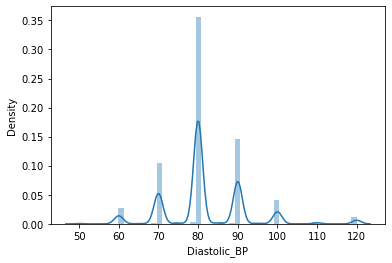

In [86]:
fixing_outliers('Diastolic_BP')

In [87]:
df.describe()

Identification_Number  Age_In_Years   Gender   Height   Weight  \
count               69201.00      69201.00 69201.00 69201.00 69201.00   
mean                50467.01         53.34     1.35   164.36    74.19   
std                 28563.92          6.77     0.48     8.20    14.38   
min                   988.00         30.00     1.00    55.00    10.00   
25%                 25744.00         48.00     1.00   159.00    65.00   
50%                 50482.00         54.00     1.00   165.00    72.00   
75%                 75150.00         58.00     2.00   170.00    82.00   
max                 99999.00         65.00     2.00   250.00   200.00   

       Systolic_BP  Diastolic_BP  Cholesterol_Level  Glucose_Level   Smoker  \
count     69201.00      69201.00           69201.00       69201.00 69201.00   
mean        126.74         81.83               1.37           1.23     0.09   
std          17.21         10.42               0.68           0.57     0.28   
min          60.00         50.00               1.00           1.00     0.00   
25%         120.00         80.00               1.00           1.00     0.00   
50%         120.00         80.00               1.00           1.00     0.00   
75%         140.00         90.00               2.00           1.00     0.00   
max         200.00        120.00               3.00           3.00     1.00   

       Drinker  Physically_Active  CVD_Patient  
count 69201.00           69201.00     69201.00  
mean      0.05               0.80         0.50  
std       0.23               0.40         0.50  
min       0.00               0.00         0.00  
25%       0.00               1.00         0.00  
50%       0.00               1.00         0.00  
75%       0.00               1.00         1.00  
max       1.00               1.00         1.00

Text(0.5, 0, 'Systolic Blood Pressure in mm of Hg')

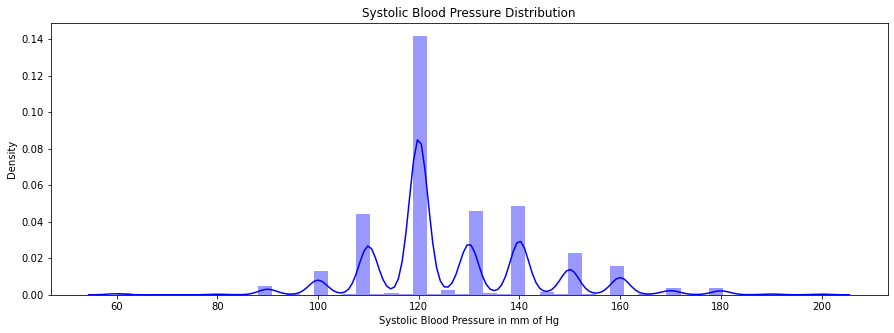

In [88]:
plt.figure(figsize=(15,5))
sns.distplot(df["Systolic_BP"], color="blue")
plt.title("Systolic Blood Pressure Distribution")
plt.ylabel("Density")
plt.xlabel("Systolic Blood Pressure in mm of Hg")

Text(0.5, 0, 'Diastolic Blood Pressure in mm of Hg')

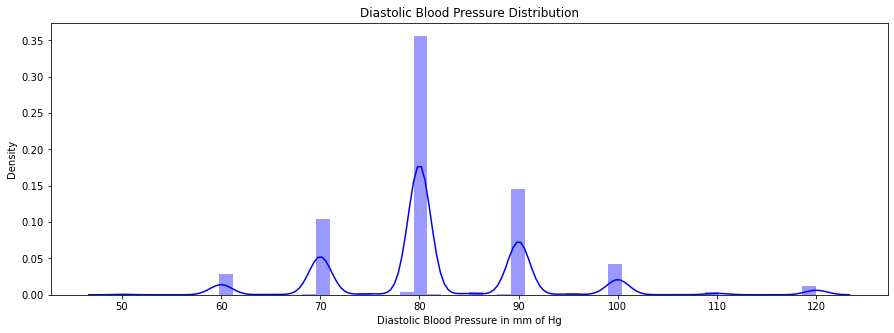

In [89]:
plt.figure(figsize=(15,5))
sns.distplot(df["Diastolic_BP"], color="blue")
plt.title("Diastolic Blood Pressure Distribution")
plt.ylabel("Density")
plt.xlabel("Diastolic Blood Pressure in mm of Hg")

Number of outliers that they are less than lower outer fence:  90 
Number of outliers that they are bigger than upper outer fence:  2


count   69201.00
mean      164.39
std         7.97
min       126.00
25%       159.00
50%       165.00
75%       170.00
max       203.00
Name: Height, dtype: float64

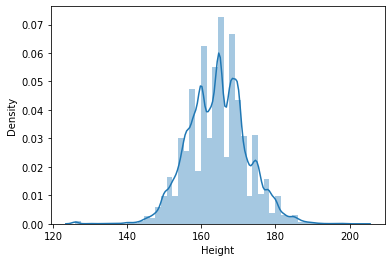

In [90]:
fixing_outliers('Height')

Number of outliers that they are less than lower outer fence:  2 
Number of outliers that they are bigger than upper outer fence:  165


count   69201.00
mean       74.16
std        14.18
min        14.00
25%        65.00
50%        72.00
75%        82.00
max       133.00
Name: Weight, dtype: float64

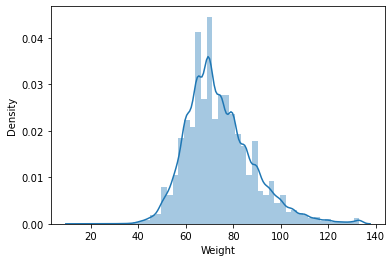

In [91]:
fixing_outliers('Weight')

# Feature Engineering

In [92]:
df['BMI'] = df['Weight']/ (df['Height']/100)**2

In [95]:
df.describe()

Identification_Number  Age_In_Years   Gender   Height   Weight  \
count               69201.00      69201.00 69201.00 69201.00 69201.00   
mean                50467.01         53.34     1.35   164.39    74.16   
std                 28563.92          6.77     0.48     7.97    14.18   
min                   988.00         30.00     1.00   126.00    14.00   
25%                 25744.00         48.00     1.00   159.00    65.00   
50%                 50482.00         54.00     1.00   165.00    72.00   
75%                 75150.00         58.00     2.00   170.00    82.00   
max                 99999.00         65.00     2.00   203.00   133.00   

       Systolic_BP  Diastolic_BP  Cholesterol_Level  Glucose_Level   Smoker  \
count     69201.00      69201.00           69201.00       69201.00 69201.00   
mean        126.74         81.83               1.37           1.23     0.09   
std          17.21         10.42               0.68           0.57     0.28   
min          60.00         50.00               1.00           1.00     0.00   
25%         120.00         80.00               1.00           1.00     0.00   
50%         120.00         80.00               1.00           1.00     0.00   
75%         140.00         90.00               2.00           1.00     0.00   
max         200.00        120.00               3.00           3.00     1.00   

       Drinker  Physically_Active  CVD_Patient      BMI  
count 69201.00           69201.00     69201.00 69201.00  
mean      0.05               0.80         0.50    27.49  
std       0.23               0.40         0.50     5.25  
min       0.00               0.00         0.00     4.42  
25%       0.00               1.00         0.00    23.88  
50%       0.00               1.00         0.00    26.37  
75%       0.00               1.00         1.00    30.19  
max       1.00               1.00         1.00    83.77

Text(0.5, 0, 'Body Mass Index in Kg per Squre Meter')

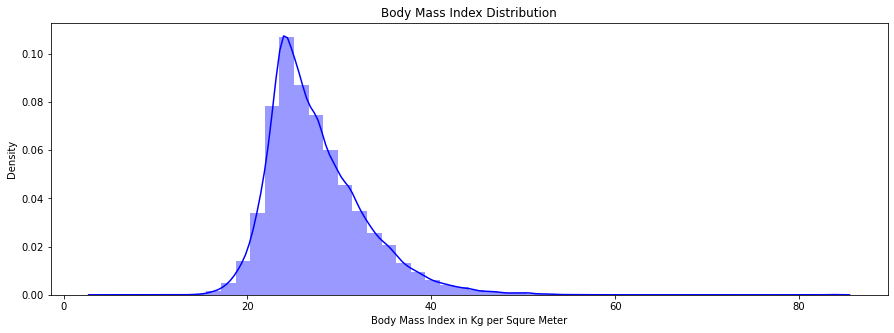

In [94]:
plt.figure(figsize=(15,5))
sns.distplot(df["BMI"], color="blue")
plt.title("Body Mass Index Distribution")
plt.ylabel("Density")
plt.xlabel("Body Mass Index in Kg per Squre Meter")

In [97]:
import scipy
from scipy.stats import ttest_ind
ttest_Systolic_BP_CVD_Patient=ttest_ind(df['Systolic_BP'],df_class['CVD_Patient'],equal_var=True)
print(ttest_Systolic_BP_CVD_Patient)

Ttest_indResult(statistic=1929.1281290977774, pvalue=0.0)


In [98]:
ttest_Diastolic_BP_CVD_Patient=ttest_ind(df['Diastolic_BP'],df_class['CVD_Patient'],equal_var=True)
print(ttest_Diastolic_BP_CVD_Patient)

Ttest_indResult(statistic=2051.1990334513875, pvalue=0.0)


In [100]:
ttest_Age_In_Years_CVD_Patient=ttest_ind(df['Age_In_Years'],df_class['CVD_Patient'],equal_var=True)
print(ttest_Age_In_Years_CVD_Patient)

Ttest_indResult(statistic=2048.6873618715963, pvalue=0.0)


In [101]:
ttest_Height_CVD_Patient=ttest_ind(df['Height'],df_class['CVD_Patient'],equal_var=True)
print(ttest_Height_CVD_Patient)

Ttest_indResult(statistic=5395.508971304546, pvalue=0.0)


In [102]:
ttest_Weight_CVD_Patient=ttest_ind(df['Weight'],df_class['CVD_Patient'],equal_var=True)
print(ttest_Weight_CVD_Patient)

Ttest_indResult(statistic=1365.5139199701339, pvalue=0.0)


In [104]:
ttest_BMI_CVD_Patient=ttest_ind(df['BMI'],df_class['CVD_Patient'],equal_var=True)
print(ttest_BMI_CVD_Patient)

Ttest_indResult(statistic=1345.1510197938915, pvalue=0.0)


In [105]:
df.head()

Identification_Number  Age_In_Years  Gender  Height  Weight  Systolic_BP  \
0                    988            62       1  155.00   69.00       130.00   
1                    989            40       1  163.00   71.00       110.00   
2                    990            60       1  165.00   70.00       120.00   
3                    991            40       2  165.00   85.00       120.00   
4                    992            64       1  155.00   62.00       120.00   

   Diastolic_BP  Cholesterol_Level  Glucose_Level  Smoker  Drinker  \
0         80.00                  2              2       0        0   
1         70.00                  1              1       0        0   
2         80.00                  1              1       0        0   
3         80.00                  1              1       1        1   
4         80.00                  1              1       0        0   

   Physically_Active  CVD_Patient   BMI  
0                  1            0 28.72  
1                  1            1 26.72  
2                  1            0 25.71  
3                  1            0 31.22  
4                  1            0 25.81

In [106]:
df.drop(columns=['Identification_Number', 'Height', 'Weight'], inplace=True)

In [107]:
df.head()

Age_In_Years  Gender  Systolic_BP  Diastolic_BP  Cholesterol_Level  \
0            62       1       130.00         80.00                  2   
1            40       1       110.00         70.00                  1   
2            60       1       120.00         80.00                  1   
3            40       2       120.00         80.00                  1   
4            64       1       120.00         80.00                  1   

   Glucose_Level  Smoker  Drinker  Physically_Active  CVD_Patient   BMI  
0              2       0        0                  1            0 28.72  
1              1       0        0                  1            1 26.72  
2              1       0        0                  1            0 25.71  
3              1       1        1                  1            0 31.22  
4              1       0        0                  1            0 25.81

In [109]:
df_class=df

In [110]:
X_fin = df_class.drop(['CVD_Patient'],axis=1)
y_fin = df_class.CVD_Patient

In [111]:
X_fin.head()


Age_In_Years  Gender  Systolic_BP  Diastolic_BP  Cholesterol_Level  \
0            62       1       130.00         80.00                  2   
1            40       1       110.00         70.00                  1   
2            60       1       120.00         80.00                  1   
3            40       2       120.00         80.00                  1   
4            64       1       120.00         80.00                  1   

   Glucose_Level  Smoker  Drinker  Physically_Active   BMI  
0              2       0        0                  1 28.72  
1              1       0        0                  1 26.72  
2              1       0        0                  1 25.71  
3              1       1        1                  1 31.22  
4              1       0        0                  1 25.81

In [214]:
import statsmodels.api as sm
X2 = sm.add_constant(X_fin) 
ols = sm.OLS(y_fin,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            CVD_Patient   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     2026.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:03:14   Log-Likelihood:                -41337.
No. Observations:               69201   AIC:                         8.270e+04
Df Residuals:                   69190   BIC:                         8.280e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6986      0.01

In [113]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_fins = pd.DataFrame(sc.fit_transform(X_fin),columns = X_fin.columns)
X_fins.head()

Age_In_Years  Gender  Systolic_BP  Diastolic_BP  Cholesterol_Level  \
0          0.91    0.00         0.50          0.43               0.50   
1          0.29    0.00         0.36          0.29               0.00   
2          0.86    0.00         0.43          0.43               0.00   
3          0.29    1.00         0.43          0.43               0.00   
4          0.97    0.00         0.43          0.43               0.00   

   Glucose_Level  Smoker  Drinker  Physically_Active  BMI  
0           0.50    0.00     0.00               1.00 0.31  
1           0.00    0.00     0.00               1.00 0.28  
2           0.00    0.00     0.00               1.00 0.27  
3           0.00    1.00     1.00               1.00 0.34  
4           0.00    0.00     0.00               1.00 0.27

In [114]:
X_fins.shape

(69201, 10)

In [115]:
y_fin.shape

(69201,)

In [116]:
#k-fold cross-validation score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=1000,tol=0.001),
                X_fins,y_fin,cv=10).mean()

0.7275907454317221

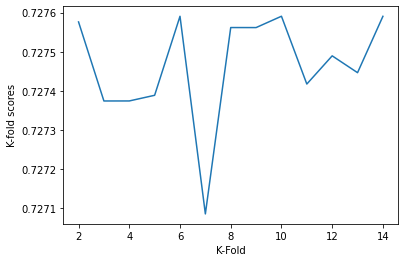

In [117]:
#Graph k-fold score for Logistic Regression Classification

mlr_scores = []
for i in range(2,15):
    mlr_scores.append(cross_val_score(LogisticRegression(),X_fins,y_fin,cv=i).mean())
    

    

plt.plot(range(2,15),mlr_scores)
plt.xlabel('K-Fold')
plt.ylabel('K-fold scores')
plt.show()

In [118]:
from sklearn.model_selection import train_test_split
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_fins,
                                        y_fin,random_state=0,test_size=0.17)


In [119]:
from sklearn.metrics import classification_report, confusion_matrix
model_mlr = LogisticRegression()
model_mlr.fit(X_train_mlr,y_train_mlr)
y_pred_mlr = model_mlr.predict(X_test_mlr)
print(classification_report(y_test_mlr,y_pred_mlr))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      5876
           1       0.77      0.68      0.72      5889

    accuracy                           0.74     11765
   macro avg       0.74      0.74      0.73     11765
weighted avg       0.74      0.74      0.73     11765



In [120]:
print(confusion_matrix(y_test_mlr,y_pred_mlr))

[[4656 1220]
 [1896 3993]]


In [121]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_mlr,y_train_mlr)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
best_model_logreg = logreg_cv.best_estimator_

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.7261473214090837


In [122]:
best_model_logreg.fit(X_train_mlr,y_train_mlr)
y_pred_mlr_best = model_mlr.predict(X_test_mlr)
print(classification_report(y_test_mlr,y_pred_mlr_best))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      5876
           1       0.77      0.68      0.72      5889

    accuracy                           0.74     11765
   macro avg       0.74      0.74      0.73     11765
weighted avg       0.74      0.74      0.73     11765



In [123]:
confusion_matrix(y_test_mlr,y_pred_mlr_best)

array([[4656, 1220],
       [1896, 3993]], dtype=int64)

In [124]:
X_knnc = X_fins
X_knnc.head()

Age_In_Years  Gender  Systolic_BP  Diastolic_BP  Cholesterol_Level  \
0          0.91    0.00         0.50          0.43               0.50   
1          0.29    0.00         0.36          0.29               0.00   
2          0.86    0.00         0.43          0.43               0.00   
3          0.29    1.00         0.43          0.43               0.00   
4          0.97    0.00         0.43          0.43               0.00   

   Glucose_Level  Smoker  Drinker  Physically_Active  BMI  
0           0.50    0.00     0.00               1.00 0.31  
1           0.00    0.00     0.00               1.00 0.28  
2           0.00    0.00     0.00               1.00 0.27  
3           0.00    1.00     1.00               1.00 0.34  
4           0.00    0.00     0.00               1.00 0.27

In [125]:
y_knnc = y_fin
y_knnc.head()

0    0
1    1
2    0
3    0
4    0
Name: CVD_Patient, dtype: int64

In [126]:
#import the knn model
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()

In [127]:
#see the cross_validated score for cv=4
from sklearn.model_selection import cross_val_score
cross_val_score(knnc,X_knnc,y_knnc,cv=6).mean()

0.6990216998957758

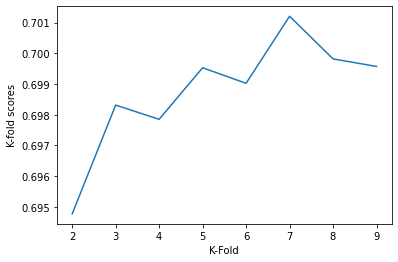

In [128]:
#Graph k-fold score for KNN

k_scores_mlr = []
for i in range(2,10):
    k_scores_mlr.append(cross_val_score(KNeighborsClassifier(),X_knnc,y_knnc,cv=i).mean())
    

    

plt.plot(range(2,10),k_scores_mlr)
plt.xlabel('K-Fold')
plt.ylabel('K-fold scores')
plt.show()


In [129]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores_knnc = []
for i in range(1,11,1):
    knnc_p = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores_knnc.append(cross_val_score(knnc_p,X_knnc,y_knnc,cv=7).mean())

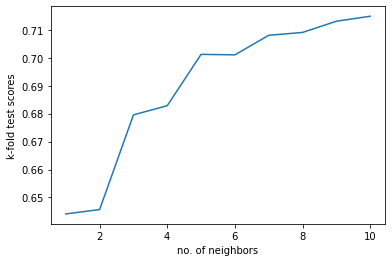

In [130]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores_knnc)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

In [131]:
# Grid Search
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 16))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knnc, param_grid, cv=7, scoring='accuracy')
grid.fit(X_knnc, y_knnc)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy')

In [132]:
# view the complete results (list of named tuples)
grid.best_score_

0.7193249267329975

In [133]:
from sklearn.model_selection import train_test_split
X_train_knnc, X_test_knnc, y_train_knnc, y_test_knnc = train_test_split(X_knnc,
                                        y_knnc,random_state=0,test_size=0.25)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix
model_knnc = grid.best_estimator_
model_knnc.fit(X_train_knnc,y_train_knnc)
y_pred_knnc = model_knnc.predict(X_test_knnc)
print(classification_report(y_test_knnc,y_pred_knnc))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      8573
           1       0.74      0.69      0.71      8728

    accuracy                           0.72     17301
   macro avg       0.72      0.72      0.72     17301
weighted avg       0.72      0.72      0.72     17301



In [135]:
print(confusion_matrix(y_test_knnc,y_pred_knnc))

[[6465 2108]
 [2715 6013]]


In [136]:
#import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [137]:
X_rfc = X_fins
y_rfc = y_fin

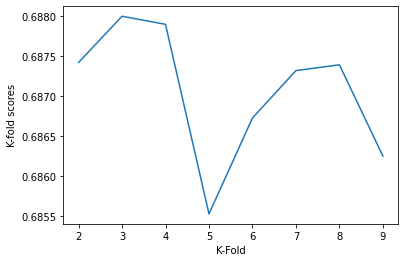

In [138]:
#Graph k-fold score for RF

k_scores_rfc = []
for i in range(2,10):
    k_scores_rfc.append(cross_val_score(RandomForestClassifier(),X_rfc,y_rfc,cv=i).mean())
    

    

plt.plot(range(2,10),k_scores_rfc)
plt.xlabel('K-Fold')
plt.ylabel('K-fold scores')
plt.show()

In [140]:
#Graph k-fold score vs no. of estimators in Random Forest
scores_rfc_es = []
for i in range(10,201,10):
    scores_rfc_es.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=0),
                                  X_rfc,y_rfc,cv=3).mean())

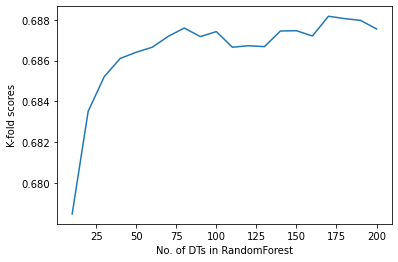

In [141]:
plt.plot(range(10,201,10),scores_rfc_es)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [143]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params_rfc = {
            'n_estimators': [70,80,90,100,110],
            'max_depth': [8,10,12,14,16]
        }
model_rfc = GridSearchCV(RandomForestClassifier(random_state=0), params_rfc,cv=3)
model_rfc.fit(X_rfc,y_rfc)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [8, 10, 12, 14, 16],
                         'n_estimators': [70, 80, 90, 100, 110]})

In [144]:
model_rfc.best_params_

{'max_depth': 12, 'n_estimators': 90}

In [145]:
model_rfc.best_score_

0.7366656551205907

In [146]:
best_model_rfc = model_rfc.best_estimator_

In [147]:
X_train_rfc,X_test_rfc,y_train_rfc,y_test_rfc = train_test_split(X_rfc,y_rfc,random_state=0)

In [148]:
best_model_rfc.fit(X_train_rfc,y_train_rfc)

RandomForestClassifier(max_depth=12, n_estimators=90, random_state=0)

In [149]:
y_pred_rfc = best_model_rfc.predict(X_test_rfc)

In [150]:
print(classification_report(y_test_rfc,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      8573
           1       0.77      0.69      0.72      8728

    accuracy                           0.74     17301
   macro avg       0.74      0.74      0.73     17301
weighted avg       0.74      0.74      0.73     17301



In [151]:
print(confusion_matrix(y_test_rfc,y_pred_rfc))

[[6739 1834]
 [2746 5982]]


In [152]:
X_adac = X_fins
y_adac = y_fin

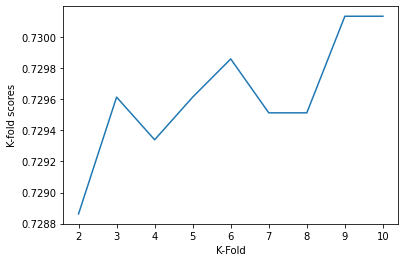

In [153]:
#Graph k-fold score for AdaBoost
from sklearn.ensemble import AdaBoostClassifier
k_scores_adac = []
for i in range(2,11):
    k_scores_adac.append(cross_val_score(AdaBoostClassifier(),X_adac,y_adac,cv=i).mean())
    

    

plt.plot(range(2,11),k_scores_adac)
plt.xlabel('K-Fold')
plt.ylabel('K-fold scores')
plt.show()

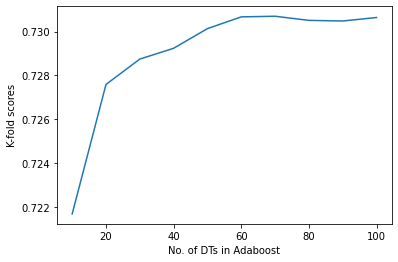

In [154]:
from sklearn.ensemble import AdaBoostClassifier

#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores_adac = []
for i in range(10,101,10):
    scores_adac.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X_adac,y_adac,cv=9).mean())
plt.plot(range(10,101,10),scores_adac)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [155]:
from sklearn.tree import DecisionTreeClassifier
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [70,80,90,100],
            'base_estimator': [DecisionTreeClassifier(max_depth=9,random_state=0),
                               DecisionTreeClassifier(max_depth=10,random_state=0),
                               DecisionTreeClassifier(max_depth=11,random_state=0)]
        }
model_adac = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=9)
model_adac.fit(X_adac,y_adac)

GridSearchCV(cv=9, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=9,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=11,
                                                                   random_state=0)],
                         'n_estimators': [70, 80, 90, 100]})

In [156]:
model_adac.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=9, random_state=0),
 'n_estimators': 70}

In [157]:
model_adac.best_score_

0.682706897299172

In [158]:
best_model_adac = model_adac.best_estimator_

In [159]:
X_train_adac,X_test_adac,y_train_adac,y_test_adac = train_test_split(X_adac,y_adac,random_state=0)

In [160]:
best_model_adac.fit(X_train_adac,y_train_adac)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                         random_state=0),
                   n_estimators=70, random_state=0)

In [161]:
y_pred_adac = best_model_adac.predict(X_test_adac)

In [162]:
print(classification_report(y_test_adac,y_pred_adac))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      8573
           1       0.70      0.64      0.67      8728

    accuracy                           0.68     17301
   macro avg       0.68      0.68      0.68     17301
weighted avg       0.68      0.68      0.68     17301



In [163]:
print(confusion_matrix(y_test_adac,y_pred_adac))

[[6181 2392]
 [3111 5617]]


In [164]:
X_svc = X_fins
y_svc = y_fin

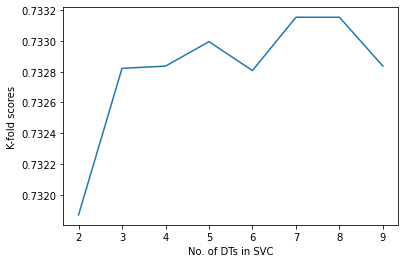

In [165]:
from sklearn.svm import SVC
#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores_svc = []
for i in range(2,10):
    scores_svc.append(cross_val_score(SVC(),
                                  X_svc,y_svc,cv=i).mean())
plt.plot(range(2,10),scores_svc)
plt.xlabel('No. of DTs in SVC')
plt.ylabel('K-fold scores')
plt.show()

In [166]:
from sklearn.model_selection import GridSearchCV

In [170]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'rbf'],
                        
                    }

model_svc = GridSearchCV(SVC(random_state=0, verbose=True),param_grid=params_dictionary,cv=7)

In [171]:
model_svc.fit(X_svc,y_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=7, estimator=SVC(random_state=0, verbose=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [172]:
model_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [173]:
model_svc.best_score_

0.7336309848158887

In [174]:
best_model_svm =model_svc.best_estimator_

In [175]:
from sklearn.model_selection import train_test_split
X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X_svc,y_svc,random_state=0)

In [176]:
best_model_svm.fit(X_train_svm,y_train_svm)

[LibSVM]

SVC(C=10, random_state=0, verbose=True)

In [177]:
best_model_svm.score(X_test_svm,y_test_svm)

0.7380498237096121

In [178]:
y_pred_svm = best_model_svm.predict(X_test_svm)

In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test_svm,y_pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      8573
           1       0.78      0.68      0.72      8728

    accuracy                           0.74     17301
   macro avg       0.74      0.74      0.74     17301
weighted avg       0.74      0.74      0.74     17301



In [180]:
print(confusion_matrix(y_test_svm,y_pred_svm))

[[6862 1711]
 [2821 5907]]


<AxesSubplot:>

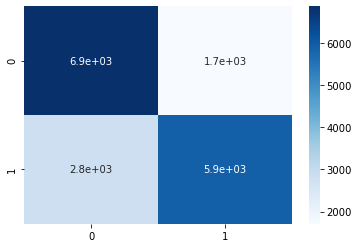

In [233]:
sns.heatmap(confusion_matrix(y_test_svm,y_pred_svm), annot=True, cmap='Blues')

# Summary of the Model Performance

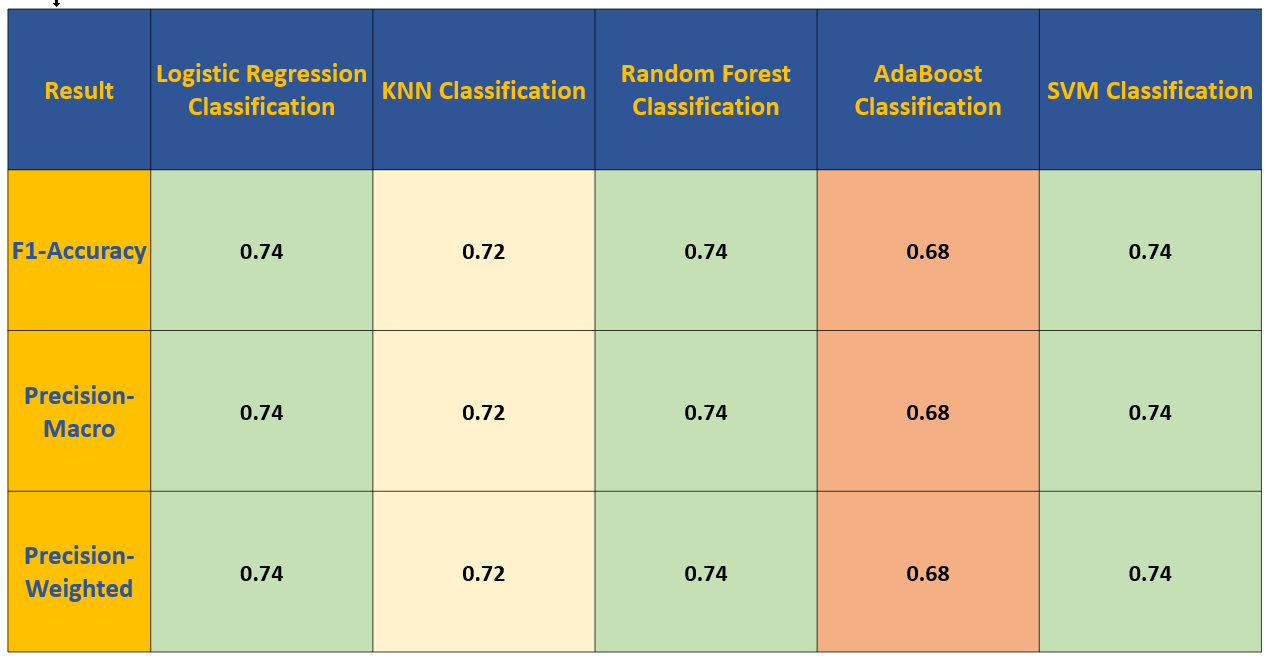

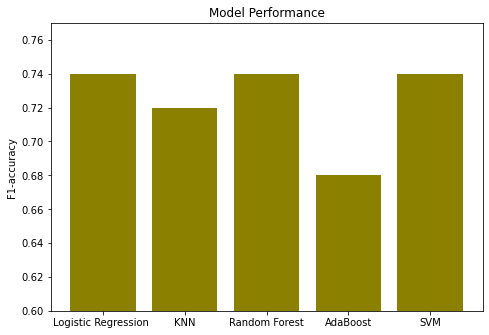

In [279]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_name = ['Logistic Regression ', 'KNN', 'Random Forest', 'AdaBoost', 'SVM']
f1_accuracy = [0.74,0.72,0.74,0.68,0.74]
ax.bar(model_name,f1_accuracy, color='#8B8000')
ax.set_ylabel('F1-accuracy')
ax.set_title('Model Performance')
plt.ylim(0.6,0.77)
plt.show()

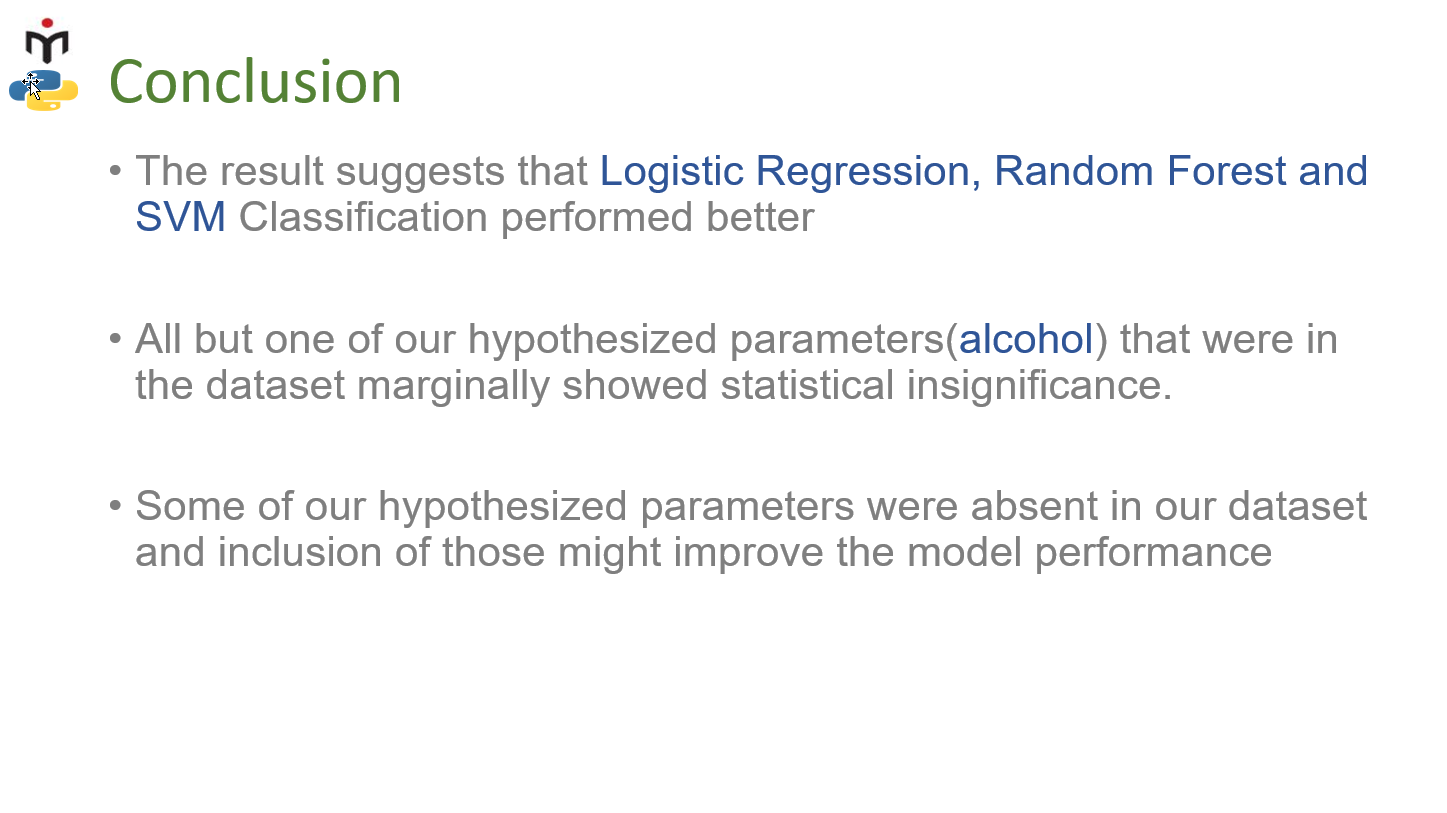